In [ ]:
!pip install pandas numpy matplotlib scikit-learn seaborn

In [ ]:
%load_ext autoreload
%autoreload 2
from pathlib import Path 
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from glob import glob
import itertools
from functools import lru_cache, cache
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import seaborn as sns; sns.set()
from sklearn.mixture import GaussianMixture

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from datetime import datetime, timedelta
datetime(2020, 1, 1) - timedelta(hours=2)

datetime.datetime(2019, 12, 31, 22, 0)

In [ ]:
from Dataset import dataset

In [ ]:
#X_ = dataset.sonde_week("Marseille_01")
X_brut = dataset.X_week_derive()

/home/lab/prep/Dataset.py:88: RuntimeWarning: Mean of empty slice.
  mean = diff_removed_nan.mean()
/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
X_brut.shape

(75, 84)

In [ ]:
x=0

datetime_1 = datetime(2020, 1, 1) + (x-1) * timedelta(hours=2)
datetime_2 = datetime(2020, 1, 1) + x * timedelta(hours=2)
self=dataset
sonde="Marseille_01"
vec1 = self.measure_df[(self.measure_df["numero"]==sonde) & (self.measure_df["weekday"]==datetime_1.weekday()) & ((self.measure_df["hour"]==datetime_1.hour) | (self.measure_df["hour"]==datetime_1.hour+1))]["E_volt_par_metre"]

vec2 = self.measure_df[(self.measure_df["numero"]==sonde) & (self.measure_df["weekday"]==datetime_2.weekday()) & ((self.measure_df["hour"]==datetime_2.hour) | (self.measure_df["hour"]==datetime_2.hour+1))]["E_volt_par_metre"]

In [ ]:
datetime(2020, 1, 1) - datetime(2020, 2, 1)

datetime.timedelta(days=-31)

In [ ]:
np.array(vec1)

array([1.19, 1.18, 1.08, 1.12, 1.08, 1.03, 0.99, 1.11, 0.94, 0.92, 1.01,
       1.  , 1.02, 1.01, 1.04, 1.04, 1.04, 1.09, 1.05, 1.03, 1.04, 1.08,
       1.07, 1.1 , 1.15, 1.15, 1.11, 1.14, 1.1 , 1.14, 1.29, 1.21, 1.23,
       1.19, 1.28, 1.27, 1.3 , 1.23, 1.19, 1.41, 1.27, 1.33, 1.25, 1.23,
       1.2 , 1.25, 1.24, 1.22, 1.29, 1.2 , 1.18, 1.2 , 1.21, 1.39, 1.16,
       1.1 , 1.15, 1.23, 1.19, 1.27, 1.17, 1.31, 1.13, 1.31, 1.2 , 1.27,
       1.32, 1.2 , 1.31, 1.35, 1.14, 1.08, 1.03, 1.13, 1.04, 1.07, 1.16,
       1.14, 1.18, 1.15, 1.09, 1.25, 1.24, 1.16, 1.2 , 1.17, 1.26, 1.13,
       1.12, 1.18, 1.16, 1.23, 1.19, 1.06, 0.95, 0.97, 1.04, 1.07, 1.09,
       1.09, 1.06, 0.96, 0.94, 1.16, 0.95, 1.02, 1.02, 1.  , 1.05, 1.08,
       1.08, 1.  , 1.06, 1.14, 1.16, 1.22, 0.97, 1.14, 1.04, 0.98, 1.06,
       1.09, 1.  , 1.06, 1.14, 1.16, 1.1 , 1.09, 1.04, 1.15, 1.1 , 1.08,
       0.99, 1.14, 1.19, 1.11])

In [ ]:
vec1.index

Int64Index([   195,    649,   1111,   1573,   2035,   2497,   2959,   3421,
              3883,   4345,
            ...
            364483, 370547, 376599, 382658, 388717, 394772, 400839, 406904,
            412972, 419041],
           dtype='int64', length=136)

In [ ]:
vec2 = [self.measure_df.loc[dataset.sonde_next_record(sonde)[i]]["E_volt_par_metre"] if i in dataset.sonde_next_record(sonde) else float("nan") for i in vec1.index]

In [ ]:
vec2[0]=float("nan")

In [ ]:
diff = (np.array(vec2) - np.array(vec1))
diff.mean()

nan

In [ ]:
self.measure_df[(self.measure_df["numero"]==sonde)]["datetime"]

0        2020-02-27 01:06:00
3        2020-02-27 03:06:00
6        2020-02-27 07:06:00
9        2020-02-27 09:06:00
12       2020-02-27 11:06:00
                 ...        
419617   2022-10-05 15:06:00
419690   2022-10-05 17:06:00
419763   2022-10-05 19:06:00
419836   2022-10-05 21:06:00
419909   2022-10-05 23:06:00
Name: datetime, Length: 10955, dtype: datetime64[ns]

In [ ]:
result = {}
for k,v in tuple(itertools.pairwise(self.measure_df[(self.measure_df["numero"]==sonde)]["datetime"].index)):
    if self.measure_df.loc[v]["datetime"] - self.measure_df.loc[k]["datetime"] < timedelta(hours=3):
        result[k] = v

In [ ]:
X = X_brut.copy()
for x, y in np.argwhere(np.isnan(X)):
    removed_nan = X[:, y][~np.isnan(X[:, y])]
    X[x, y] = np.median(removed_nan) # on remplace les missing value par la médiane

In [ ]:
dataset.measure_df[(self.measure_df["numero"]==sonde) & (self.measure_df["weekday"]==2)]["hour"].unique()

array([ 1,  3,  7,  9, 11, 13, 15, 17, 19, 21, 23,  2])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Anaylse PCA

In [ ]:
pca = PCA(n_components=10)
data_proj = pca.fit_transform(X_scaled)
xticks = dataset.X_week_labels()
xticks[0]

'L - 0H et 1H'

In [ ]:
if 0:
    fig, ax = plt.subplots(figsize=(40,30))
    ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9)
    for i, name in enumerate(dataset.sondes_names):
        ax.annotate(name, (data_proj[i, 0], data_proj[i, 1]))
    plt.grid()
    plt.xlabel(f"First principal component ({round(pca.explained_variance_ratio_[0] * 100, 2)} %)")
    plt.ylabel(f"Second principal component ({round(pca.explained_variance_ratio_[1]* 100, 2)} %)")
    plt.title('Position of the cities in France')


In [ ]:
matplotlib.rcParams['figure.dpi'] = 300

Composante principale 1


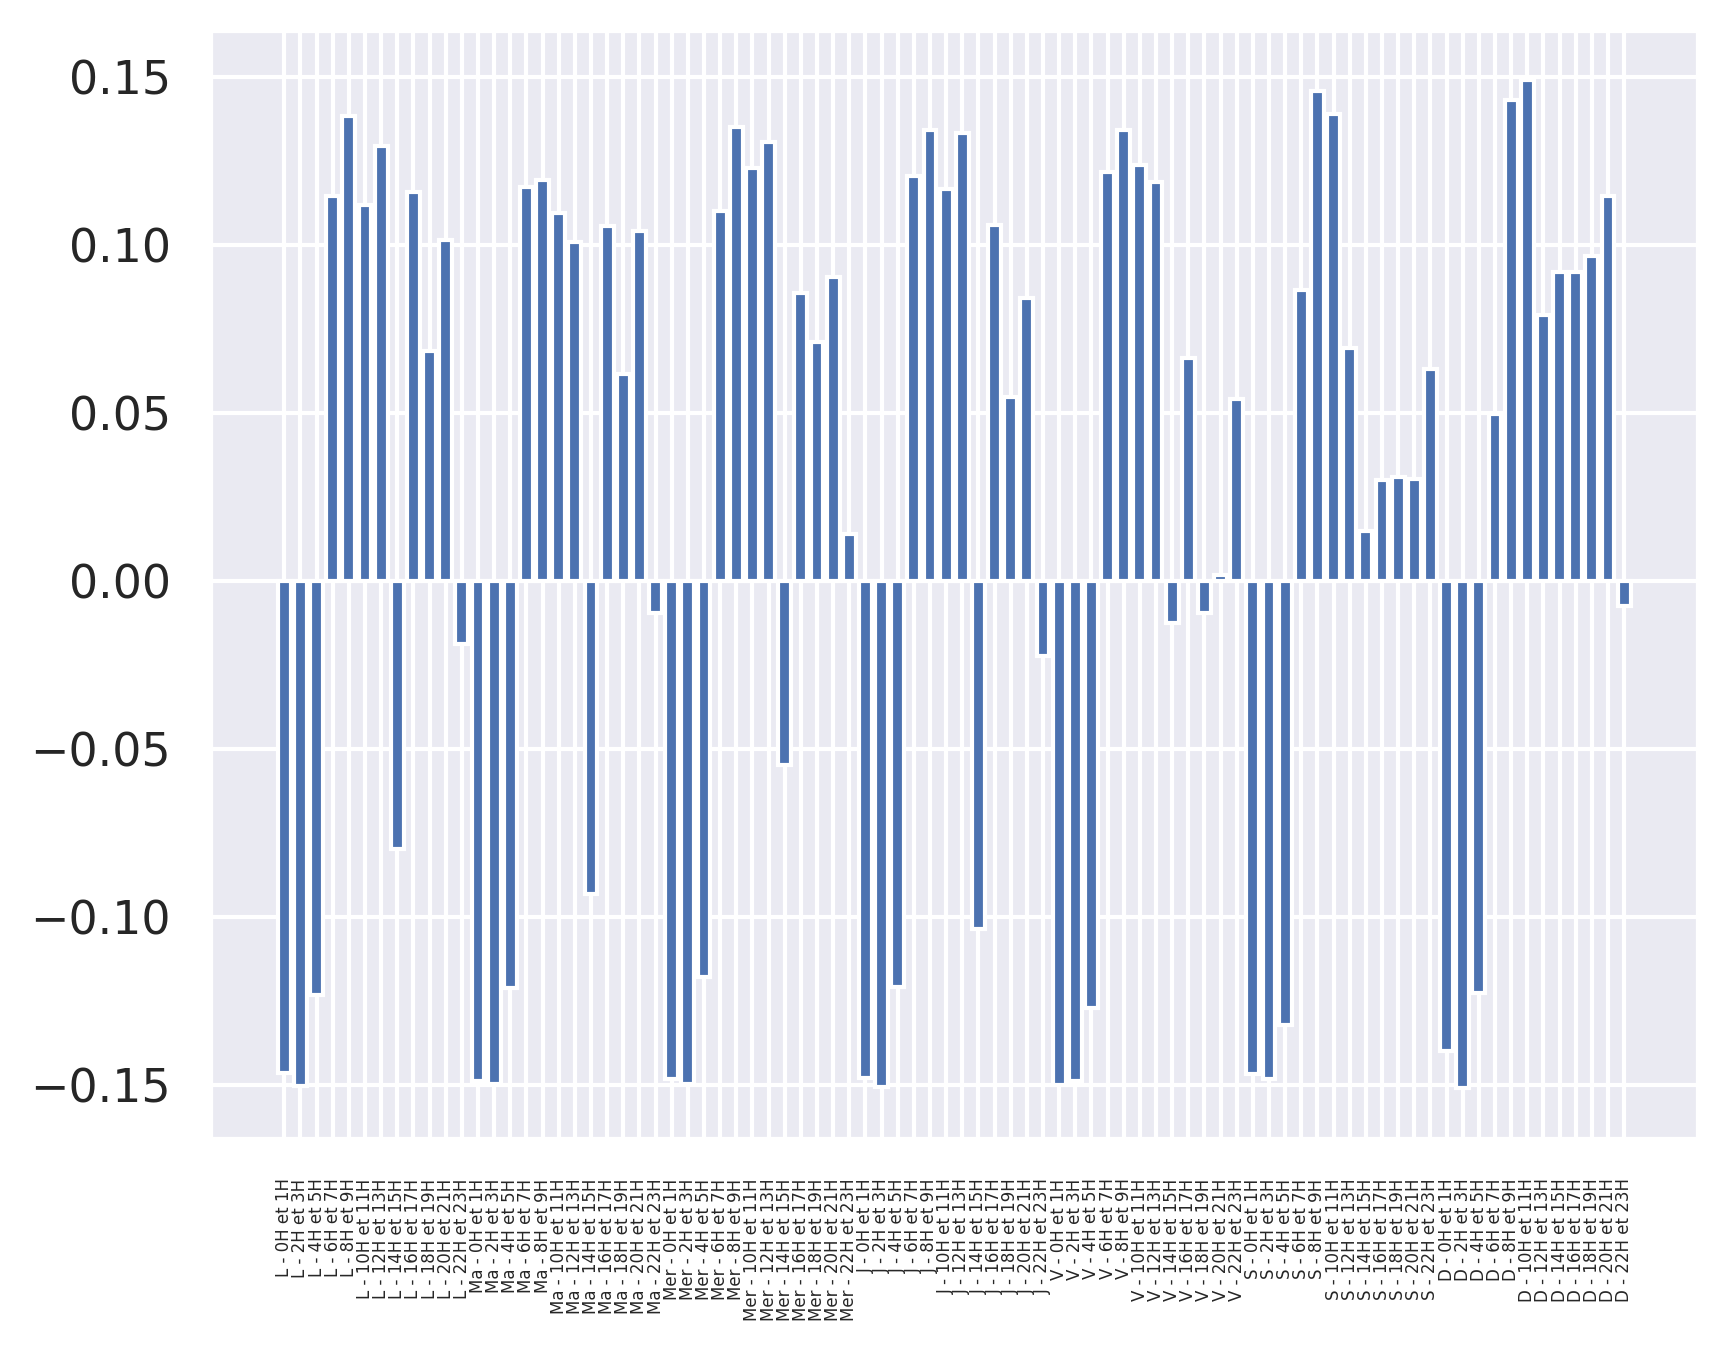

Composante principale 2


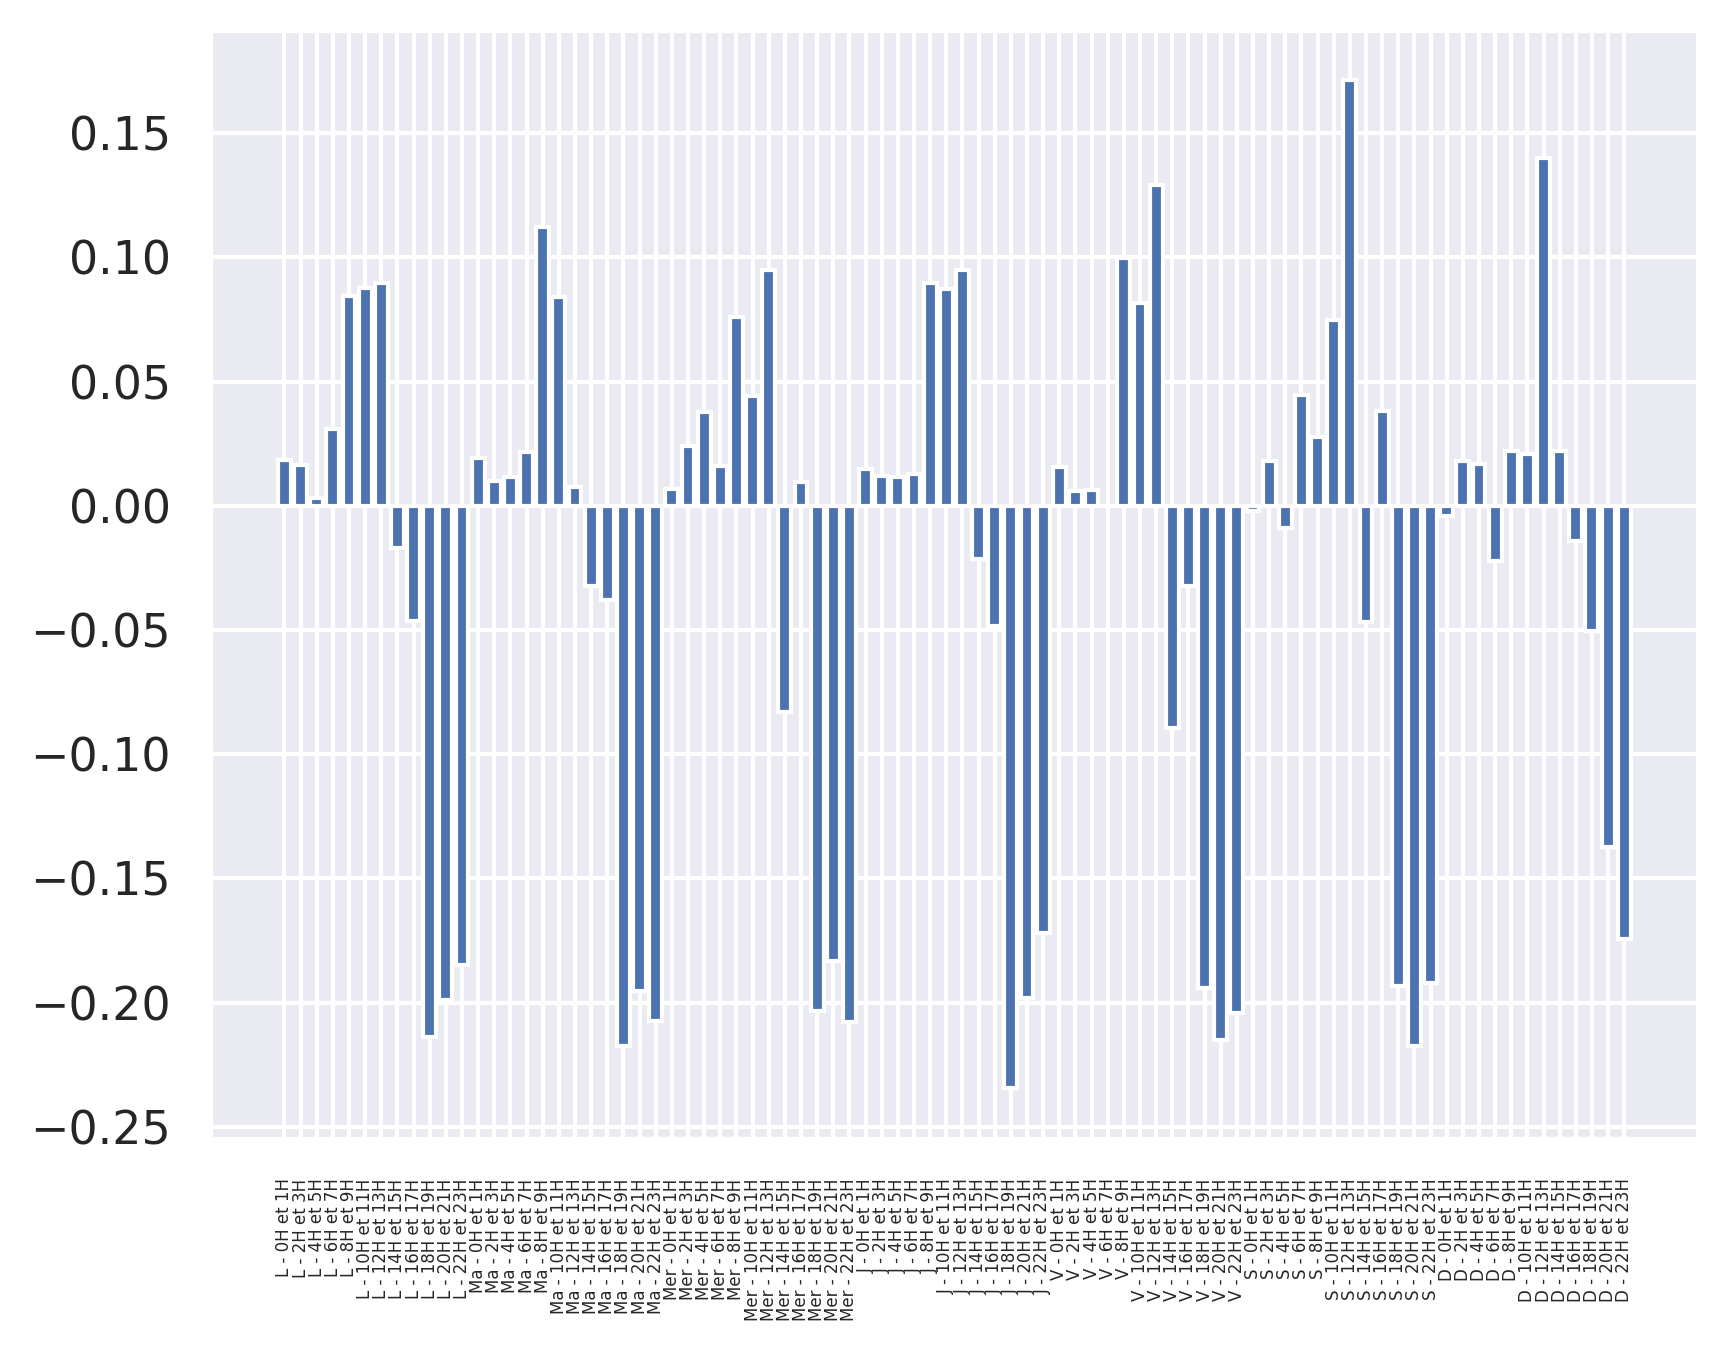

In [ ]:
for h in (0, 1):
    print(f"Composante principale {h+1}")
    plt.bar(range(84), pca.components_[h])
    plt.xticks(range(84), xticks, rotation=90, fontsize=4)
    plt.show()

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
n_clusters = 3
#bandwidth = estimate_bandwidth(X, quantile=0.05, n_samples=500)

#kmeans = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X) 
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
colors = 'r g b k'.split()#("#d8495f","#cc3284","#904493","#8633d0","#5d73d7","#32909e","#328c7b","#41945e","#ae7b38","#d25935")

In [95]:
fig, ax = plt.subplots(figsize=(40,30))
ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9, c=[colors[f] for f in labels])
for i, name in enumerate(dataset.sondes_names):
    ax.annotate(name, (data_proj[i, 0], data_proj[i, 1]))
plt.grid()
plt.xlabel(f"Première composante principale ({round(pca.explained_variance_ratio_[0] * 100, 2)} %)")
plt.ylabel(f"Deuxième composante principale ({round(pca.explained_variance_ratio_[1]* 100, 2)} %)")
plt.title('')
plt.savefig('ACP.png')

/tmp/ipykernel_234/398116115.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmax' will be ignored
  ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9, c=[colors[f] for f in labels])


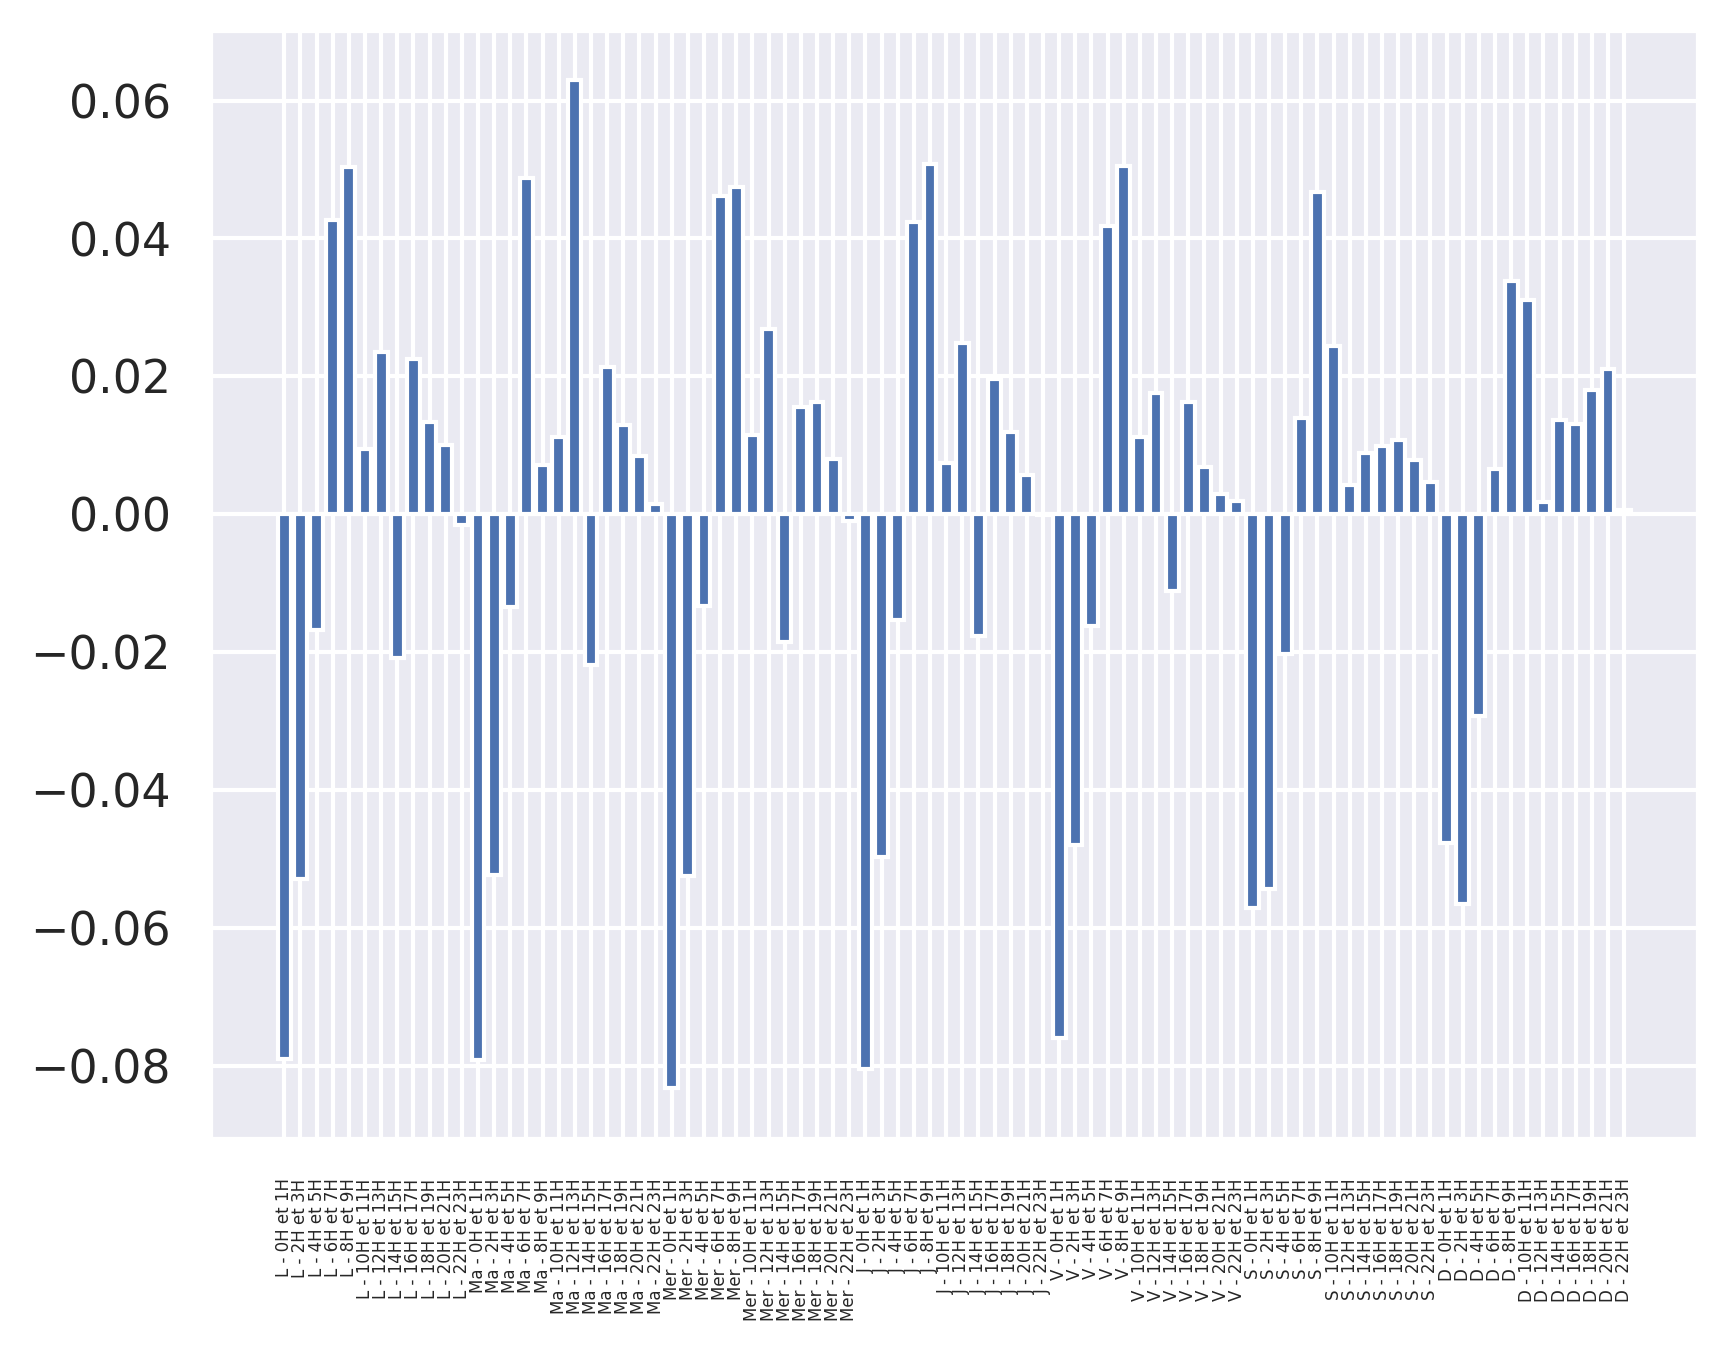

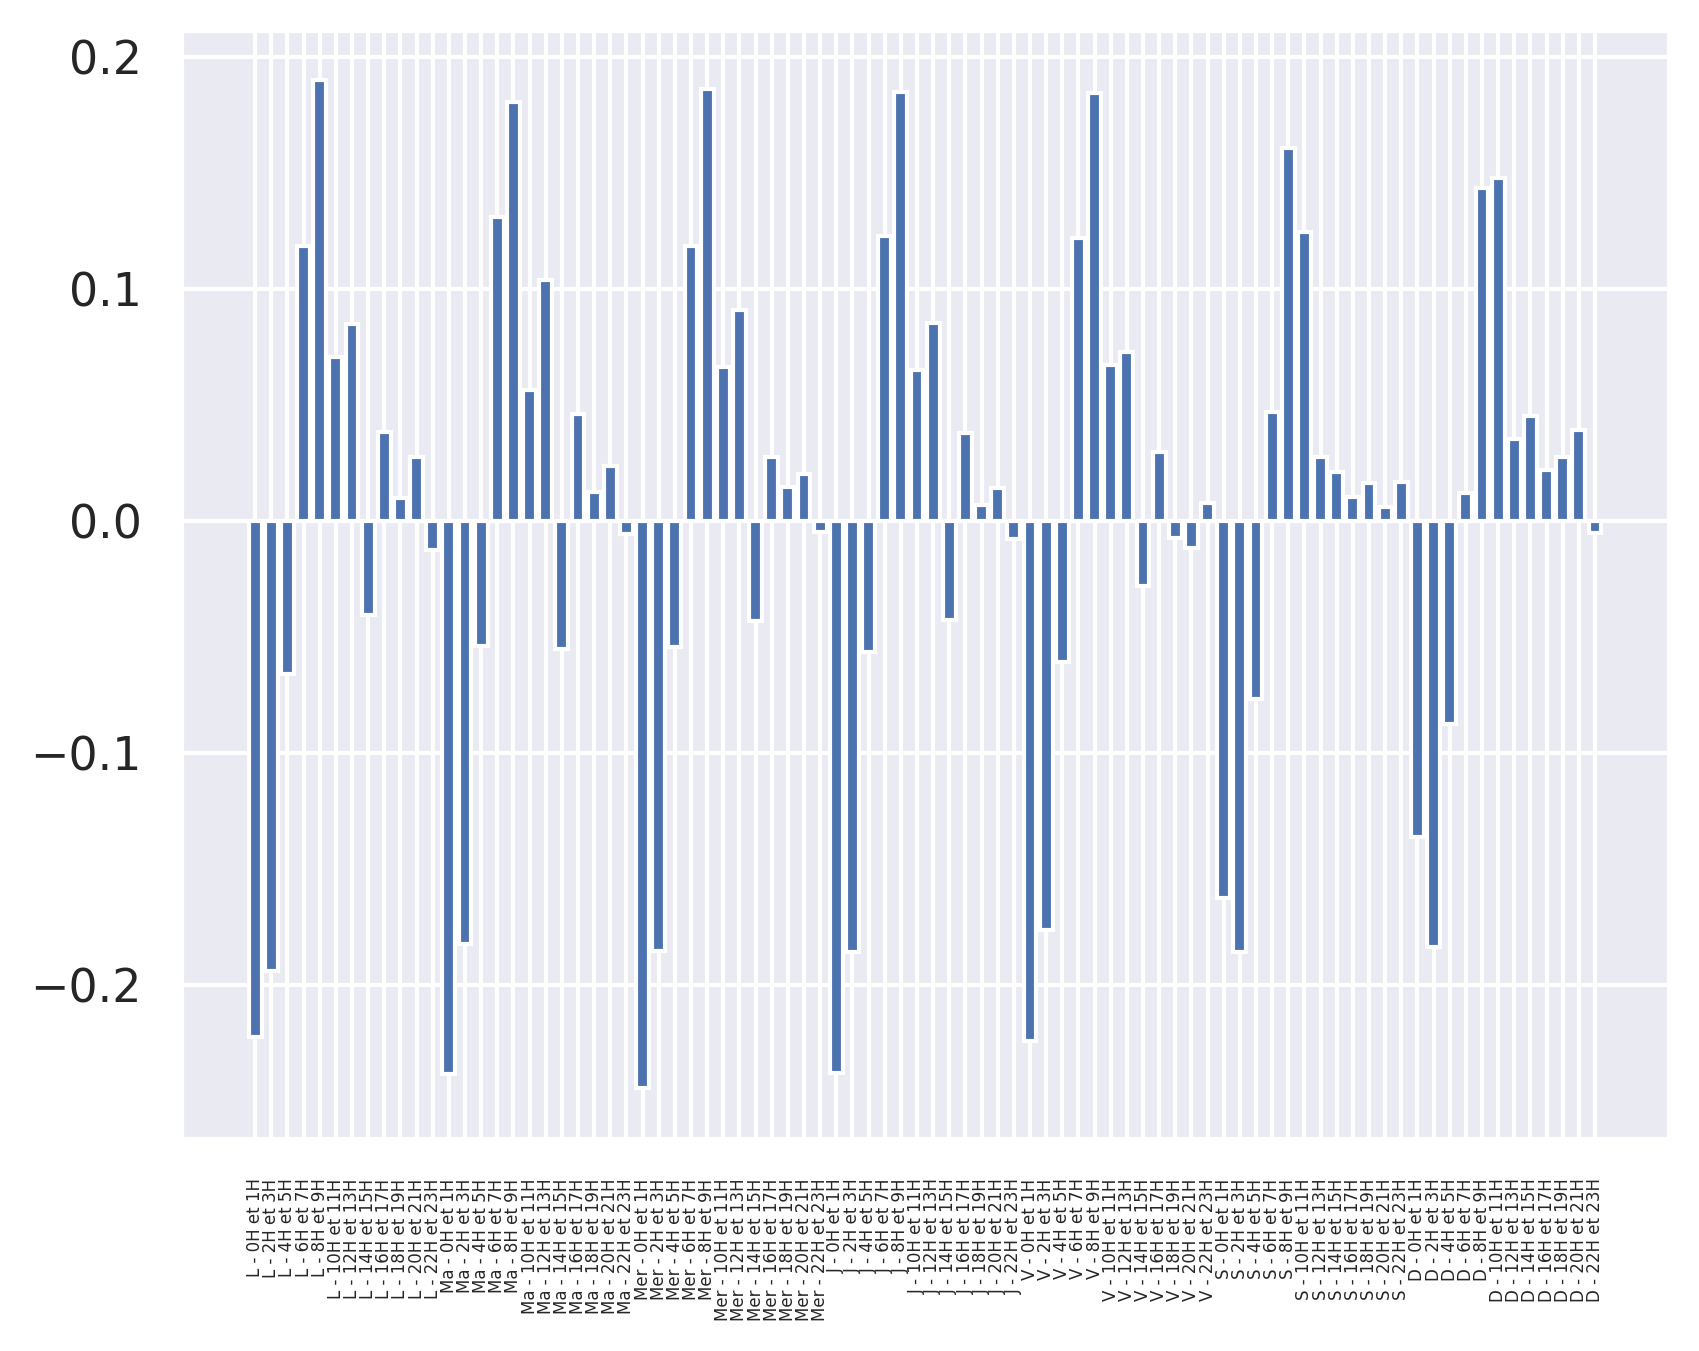

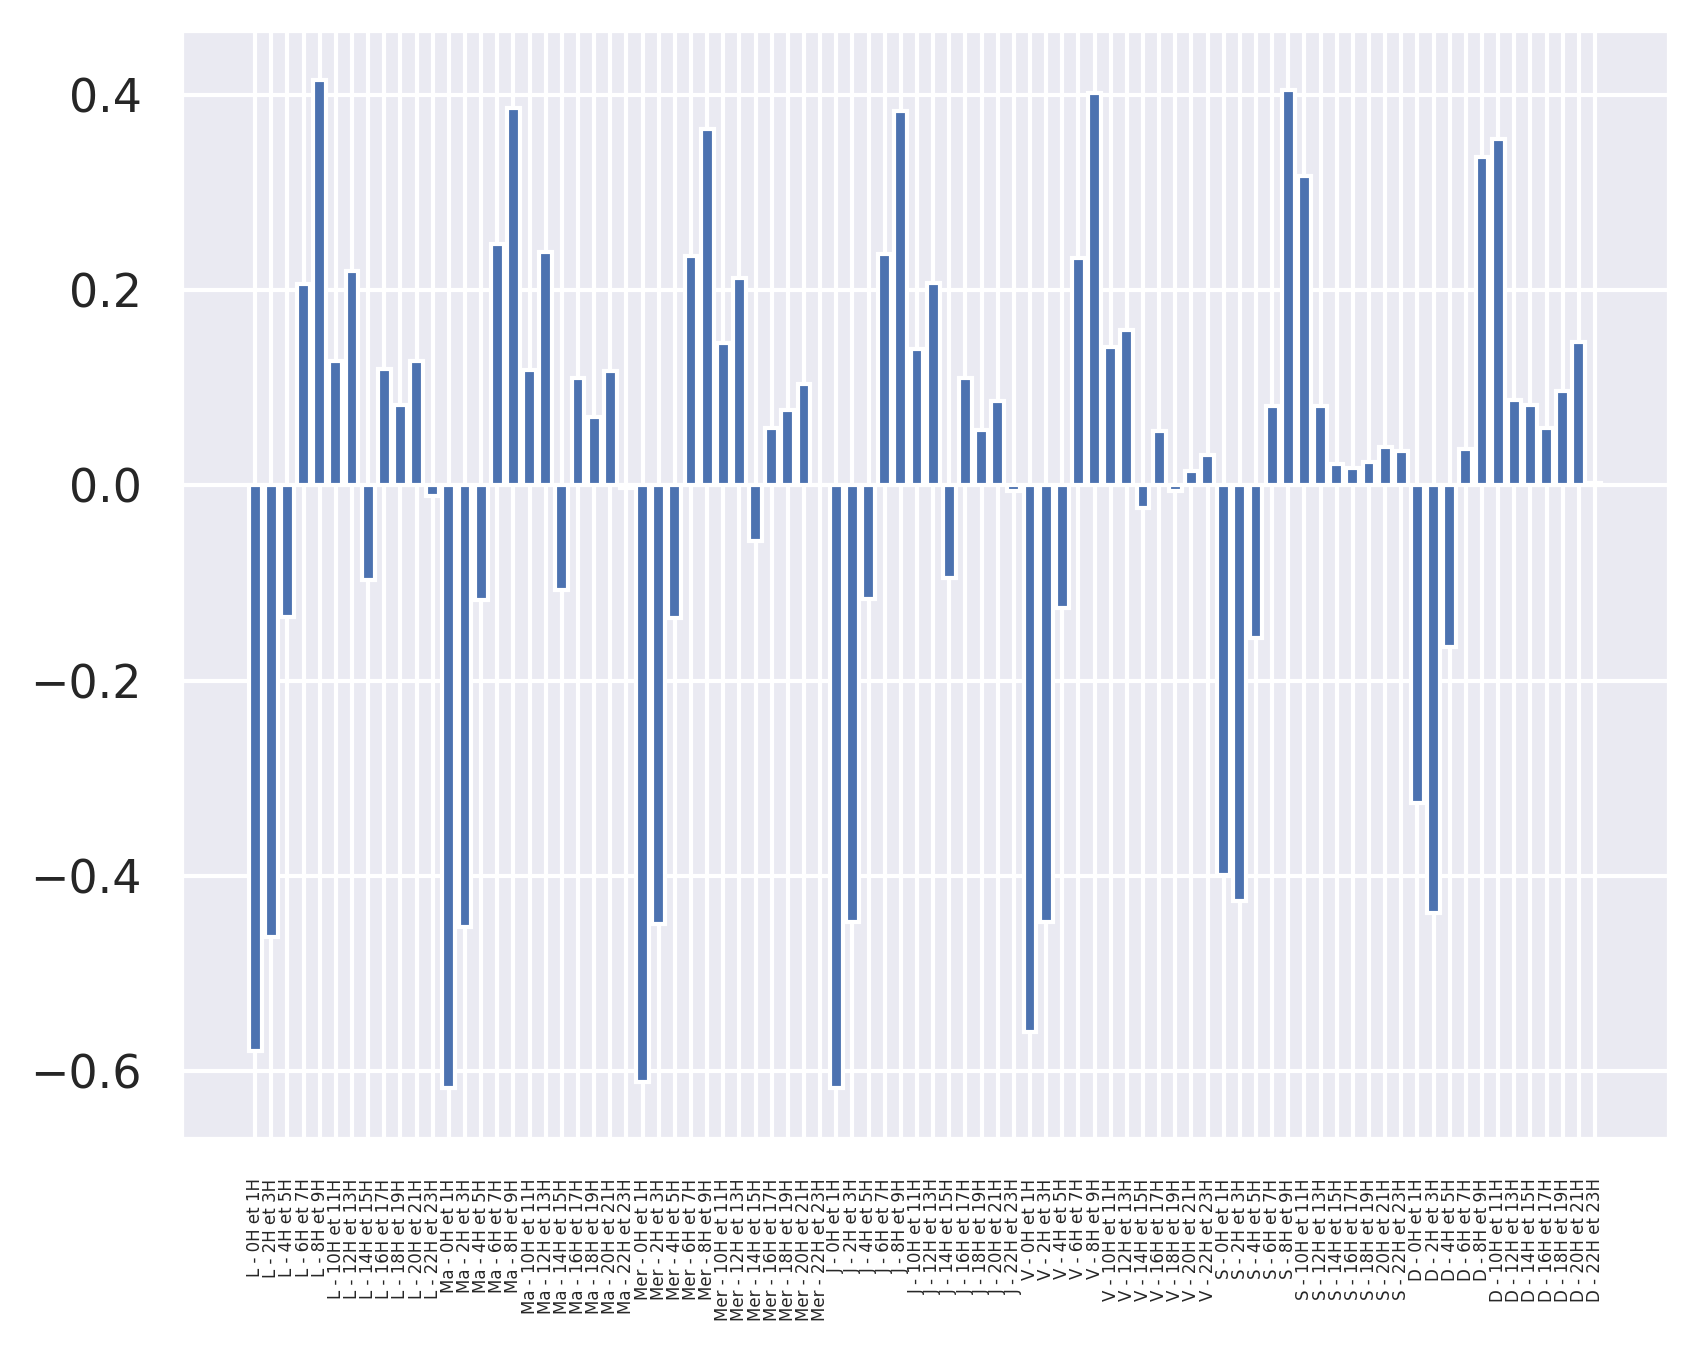

In [96]:
for i, f in enumerate(kmeans.cluster_centers_):
    plt.bar(range(len(f)), f)
    plt.xticks(range(len(f)), xticks, rotation=90, fontsize=4)
    plt.savefig(f'centroide{i}.png')
    plt.show()

In [ ]:
kmeans.labels_

array([1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 0], dtype=int32)

In [ ]:
dict_cluster = {sonde:classe for sonde, classe in zip(dataset.sondes_names, kmeans.labels_)}
dict_cluster

{'Marseille_01': 1,
 'Marseille_02': 1,
 'Marseille_03': 1,
 'Nantes_01': 2,
 'Nantes_02': 2,
 'Nantes_03': 1,
 'Paris_8e_02': 0,
 'Paris_8e_01': 1,
 'Paris_8e_03': 0,
 'Bordeaux_02': 0,
 'Bordeaux_01': 2,
 'Bordeaux_03': 1,
 'Mérignac_02': 0,
 'Mérignac_01': 0,
 'Mulhouse_03': 2,
 'Mulhouse_01': 1,
 'Mulhouse_02': 1,
 'Talence_01': 0,
 'Bègles_01': 1,
 'Artigues-près-Bordeaux_01': 0,
 'Saint-Aubin-de-Médoc_01': 1,
 'Le Bouscat_01': 1,
 'Saint-Louis-de-Montferrand_01': 1,
 'Bouliac_01': 1,
 'Le Taillan-Médoc_01': 0,
 'Bassens_01': 0,
 'Le-Haillan_01': 2,
 'Villenave-d’Ornon_01': 1,
 'Saint-Médard-En-Jalles_01': 1,
 'Rennes_01': 0,
 'Rennes_05': 1,
 'Rennes_04': 2,
 'Rennes_02': 1,
 'Rennes_03': 1,
 'Bruges_01': 1,
 'Bordeaux_04': 0,
 'Parempuyre_01': 0,
 'Bordeaux_05': 0,
 'Ambares-et-Lagrave_01': 2,
 'Pessac_01': 0,
 'Carbon-Blanc_01': 0,
 'Martignas-sur-Jalle_01': 0,
 'Blanquefort_01': 2,
 'Lille_02': 1,
 'Lille_01': 0,
 'Lille_03': 1,
 'Floirac_01': 0,
 'Ambès_01': 0,
 'Lille_04': 1

In [ ]:
import shelve
df = pd.DataFrame(data={"id":tuple(range(len(dataset.sondes_names))), "numero":dataset.sondes_names, "cluster":kmeans.labels_})
with shelve.open('clusters') as db:
    db['df'] = df

# GMM

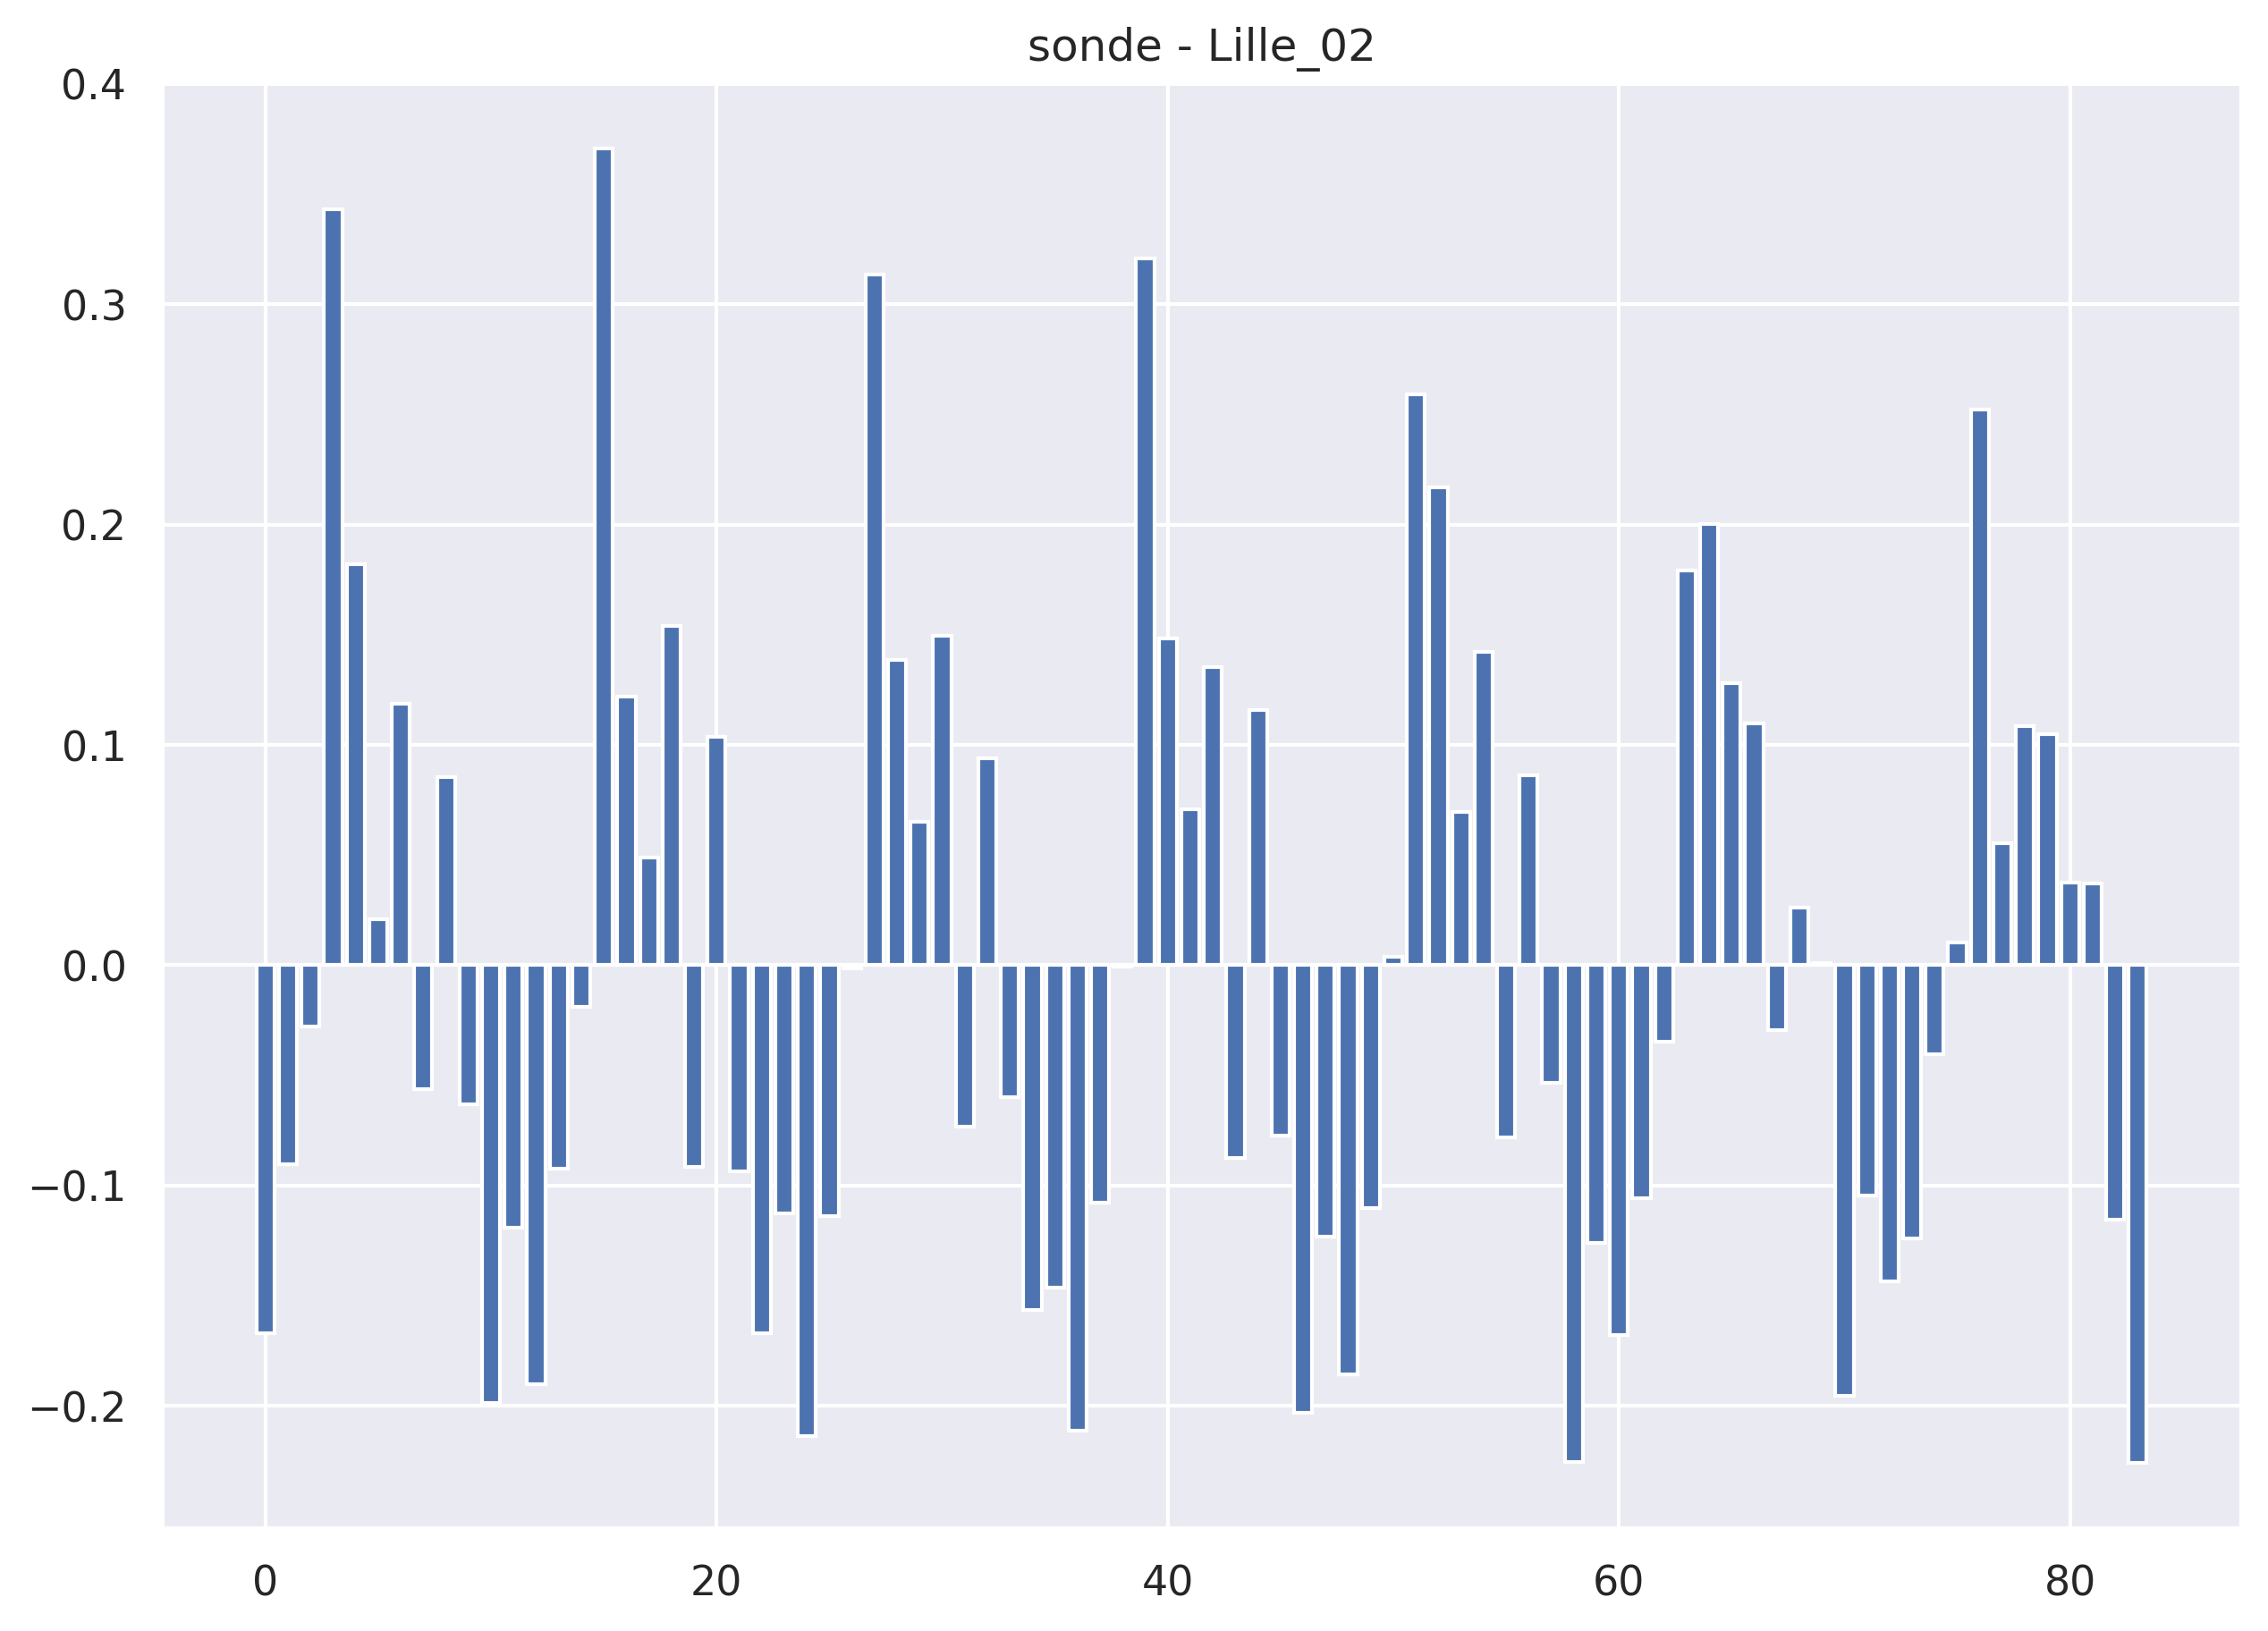

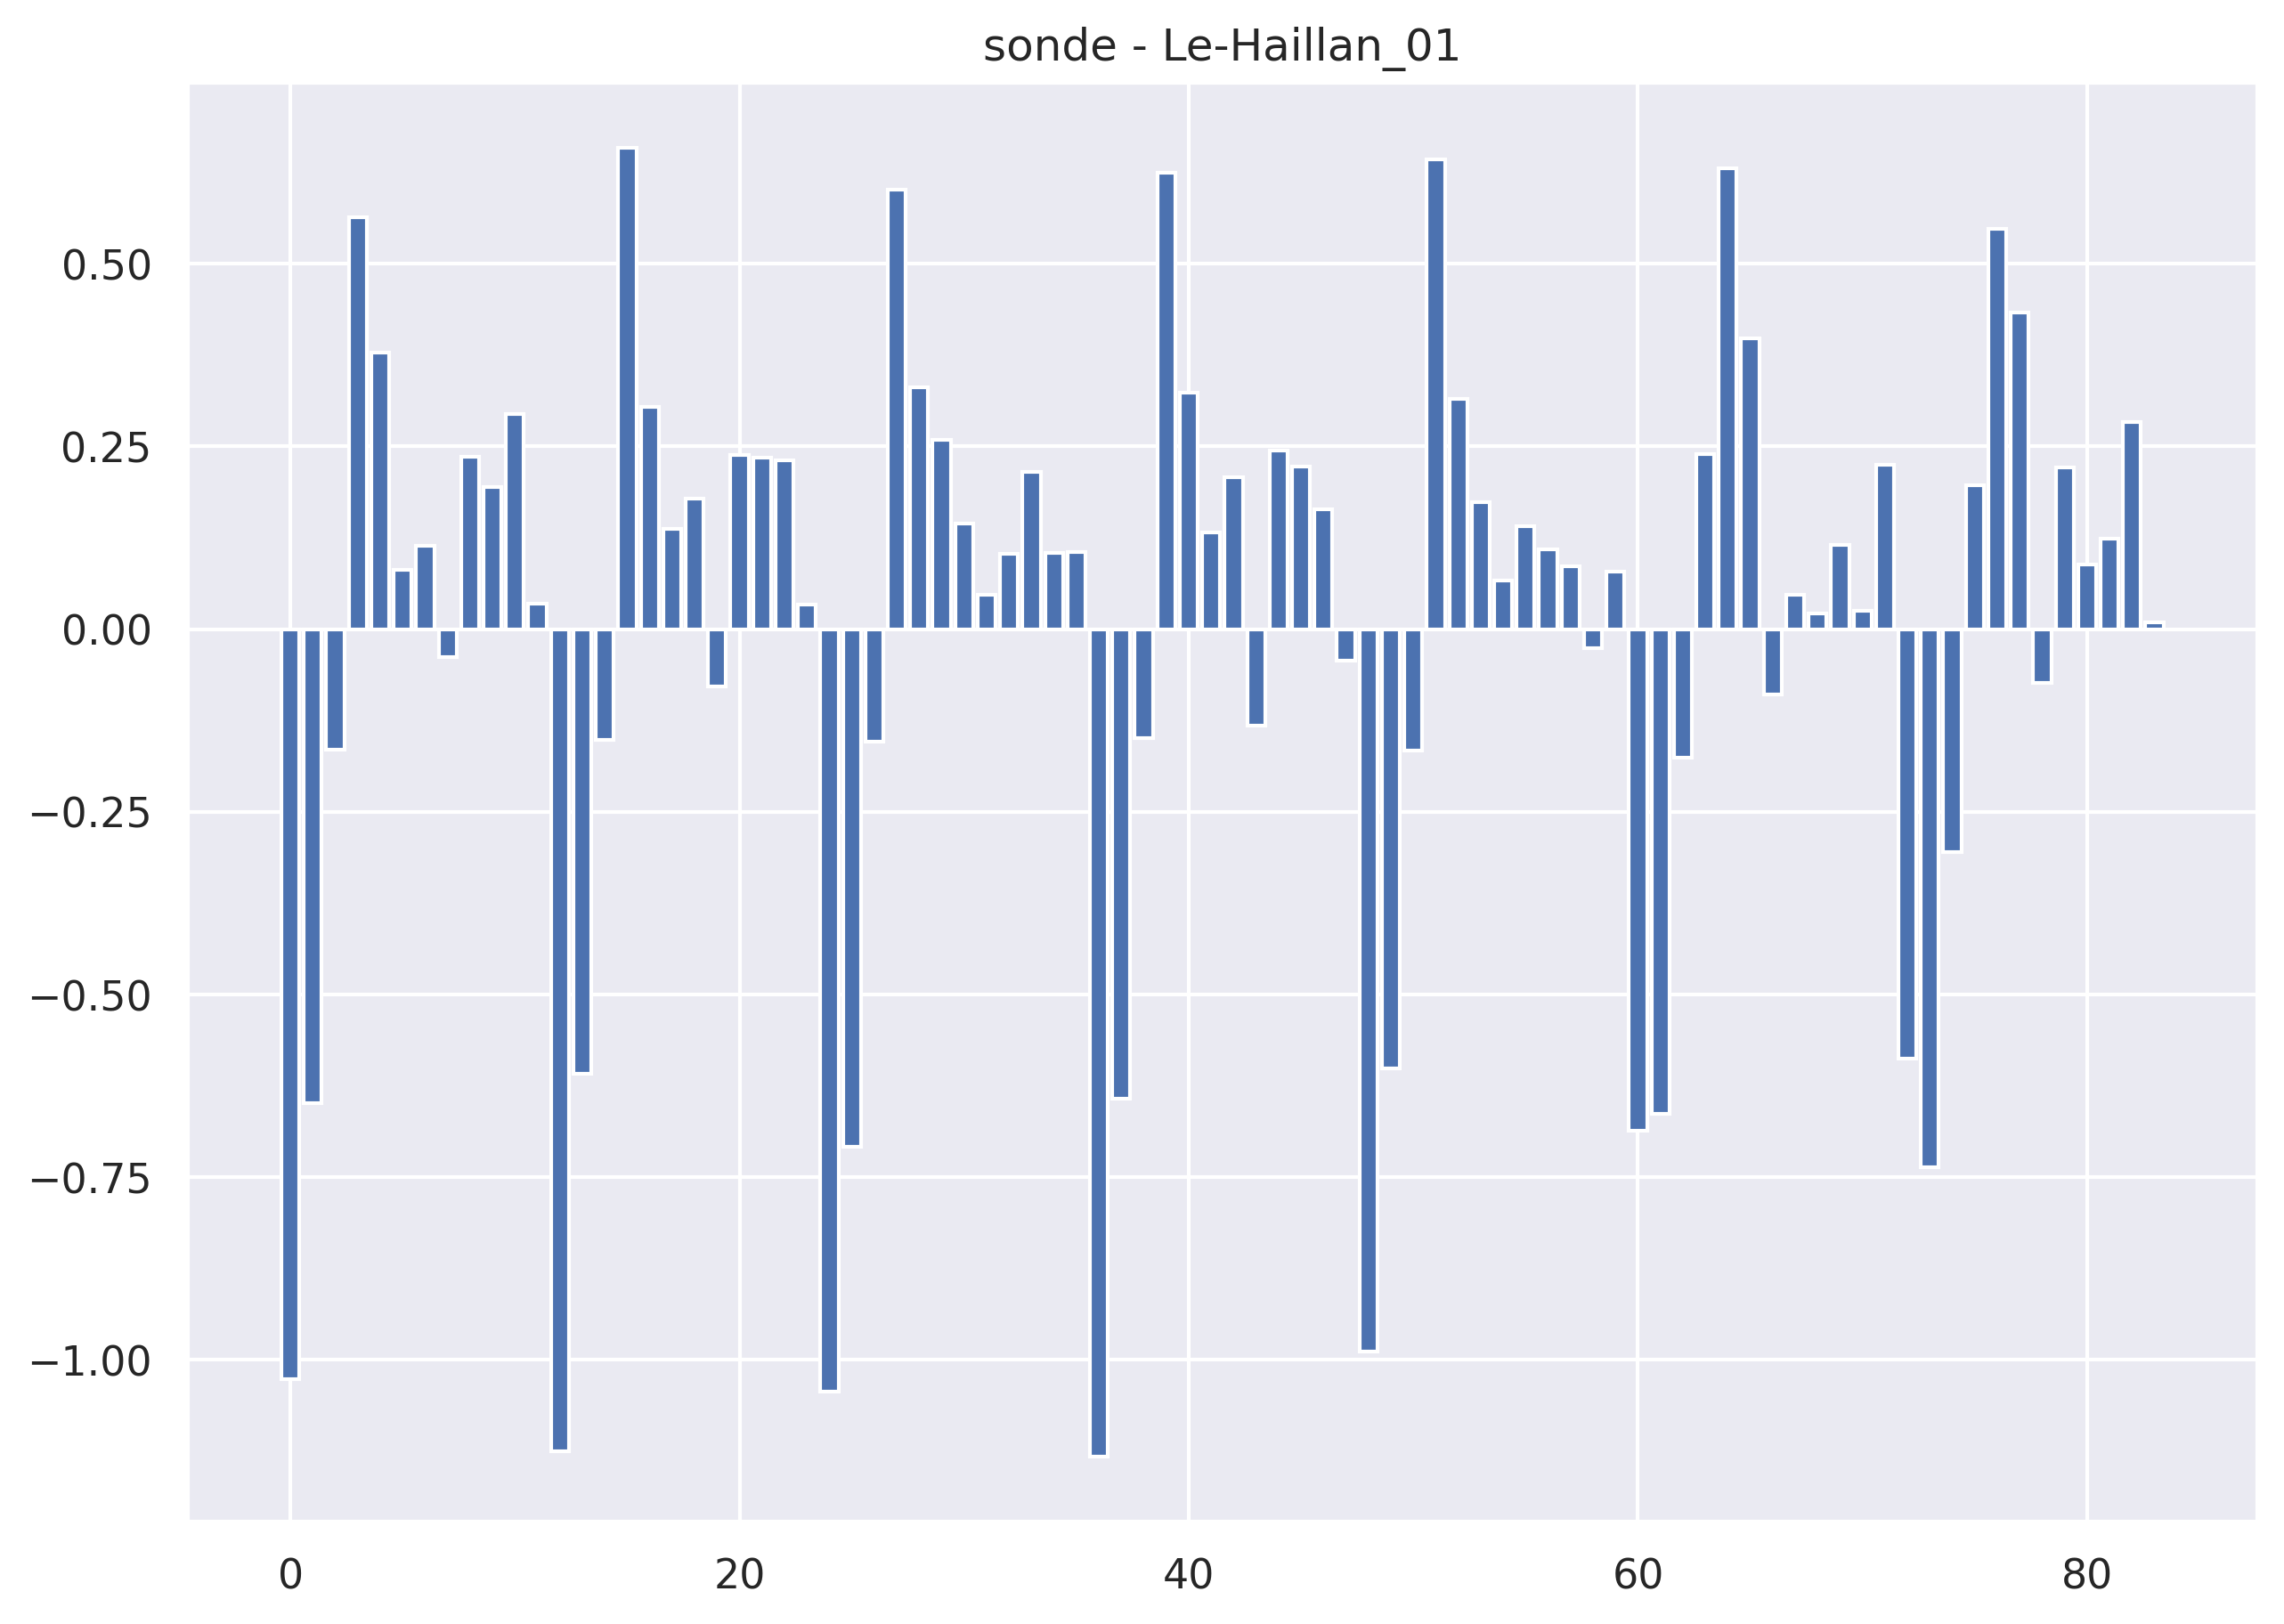

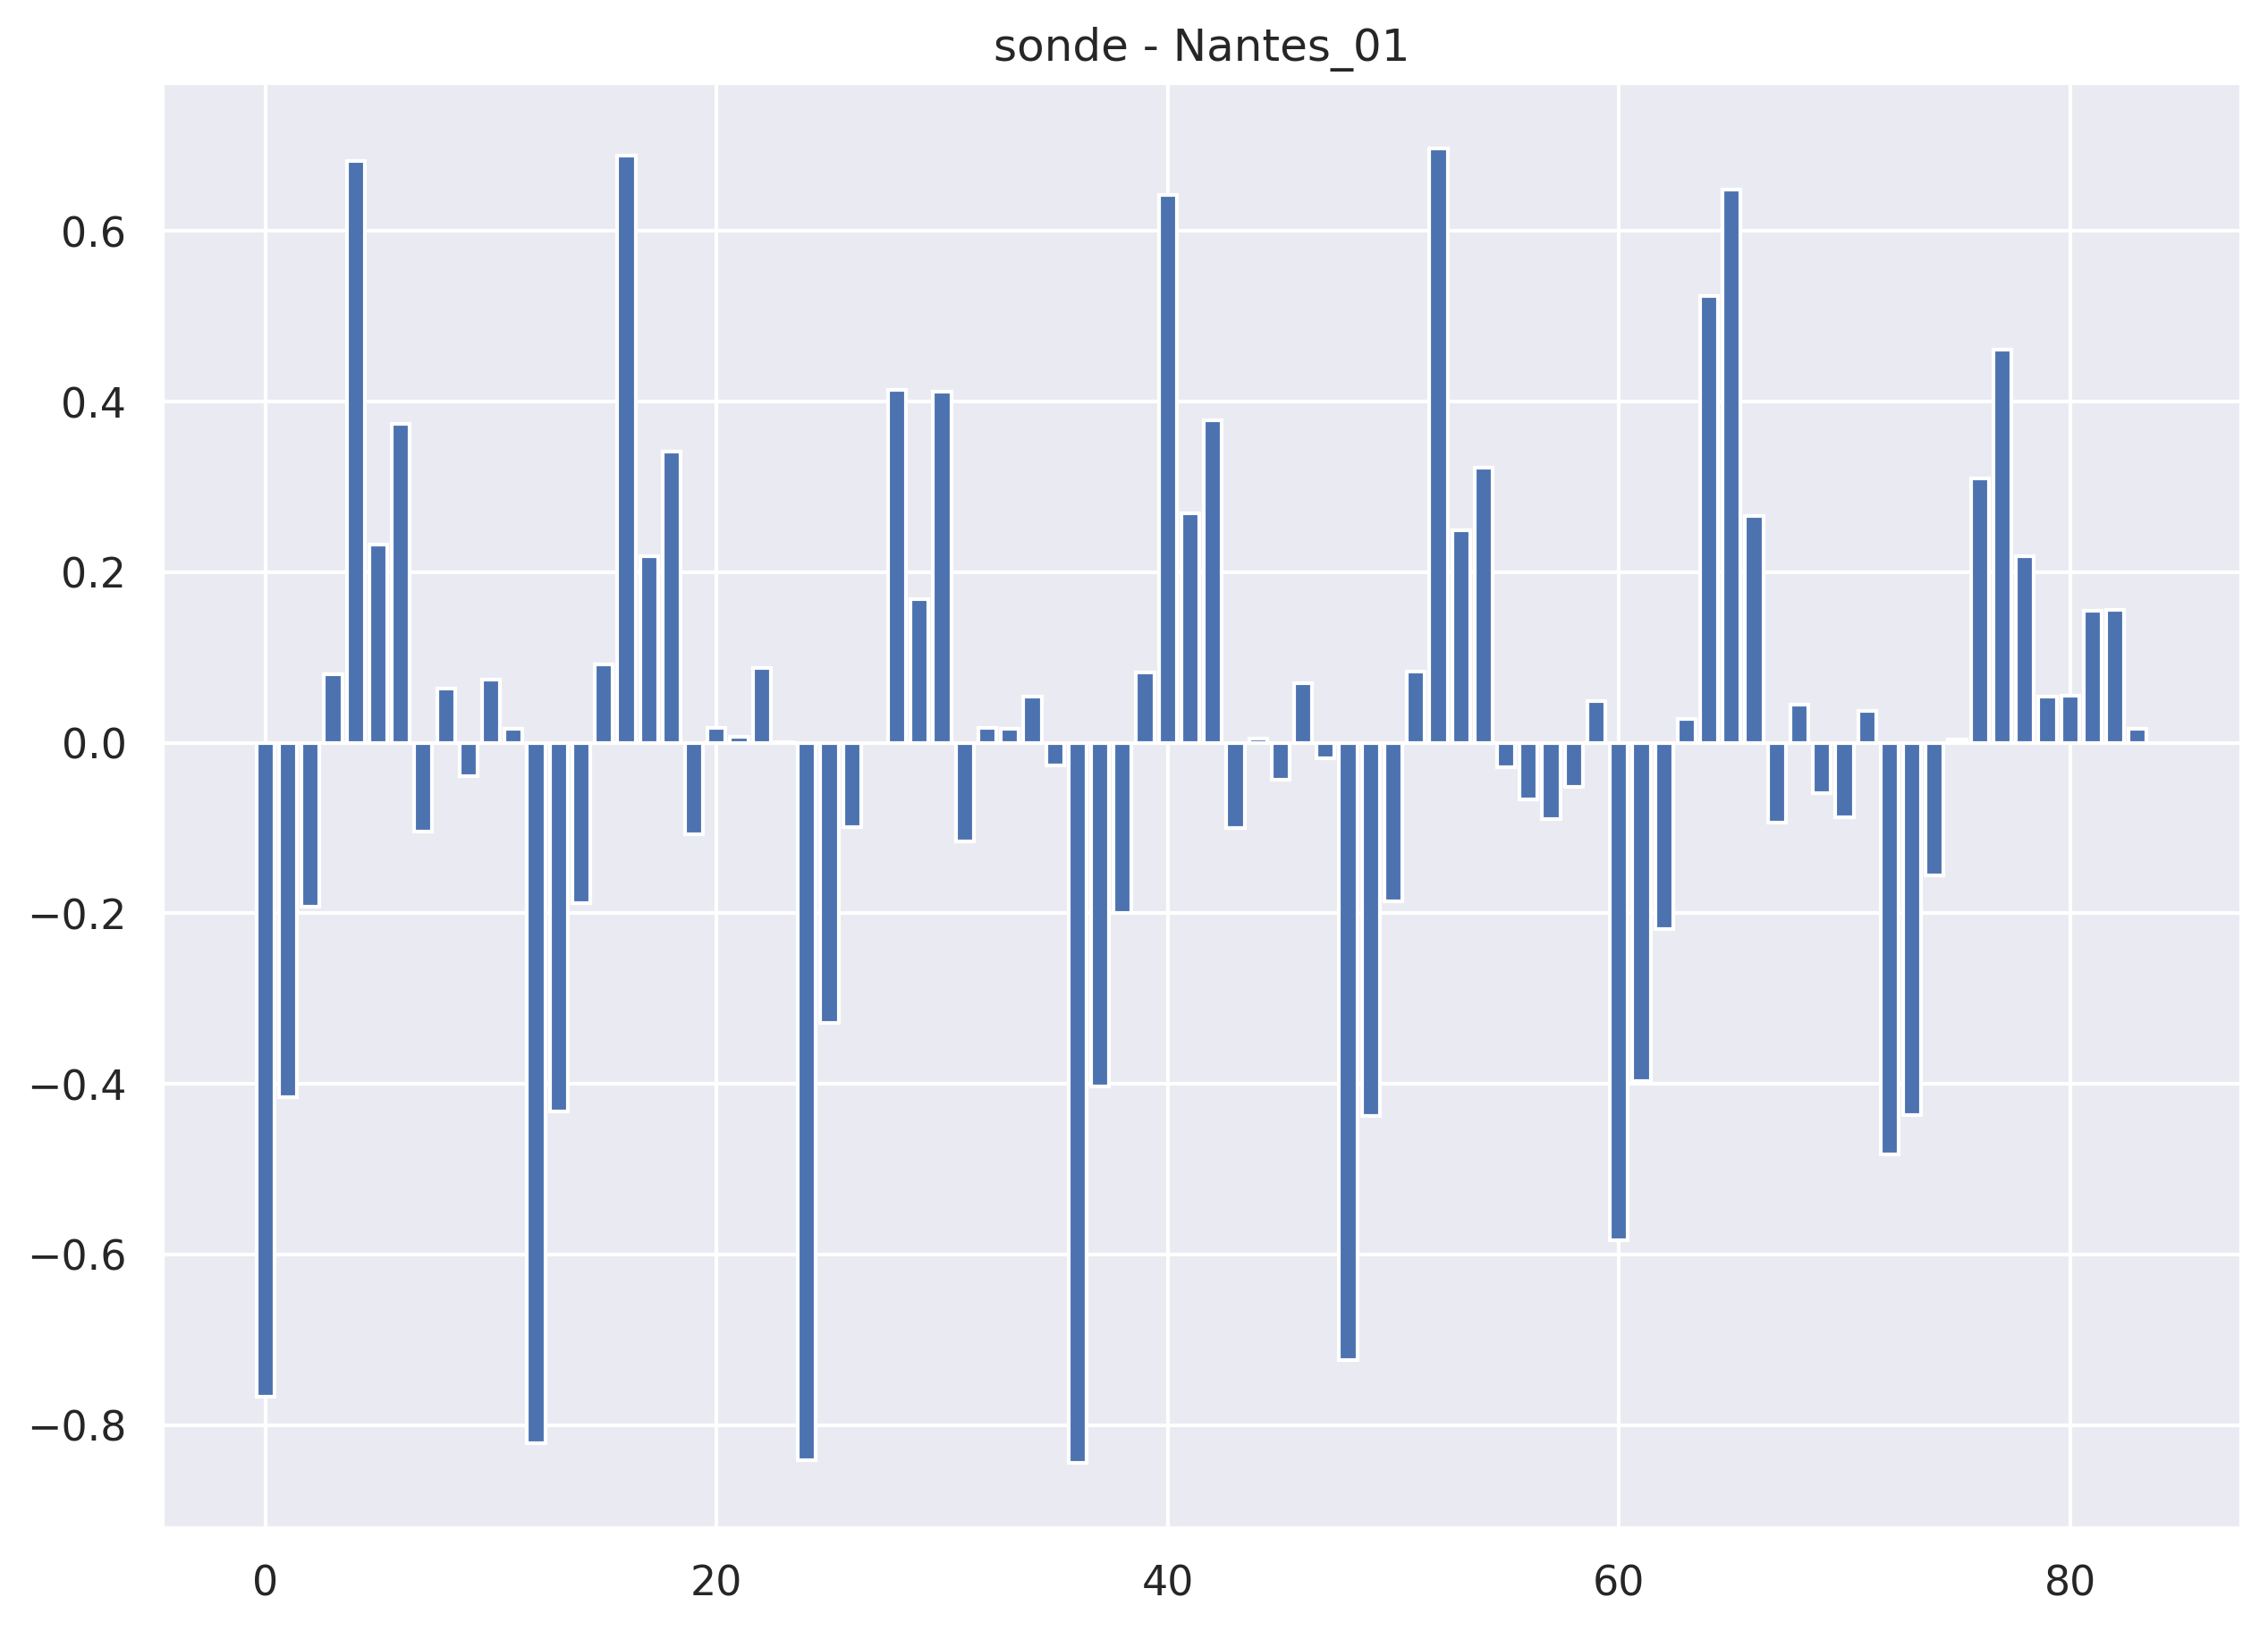

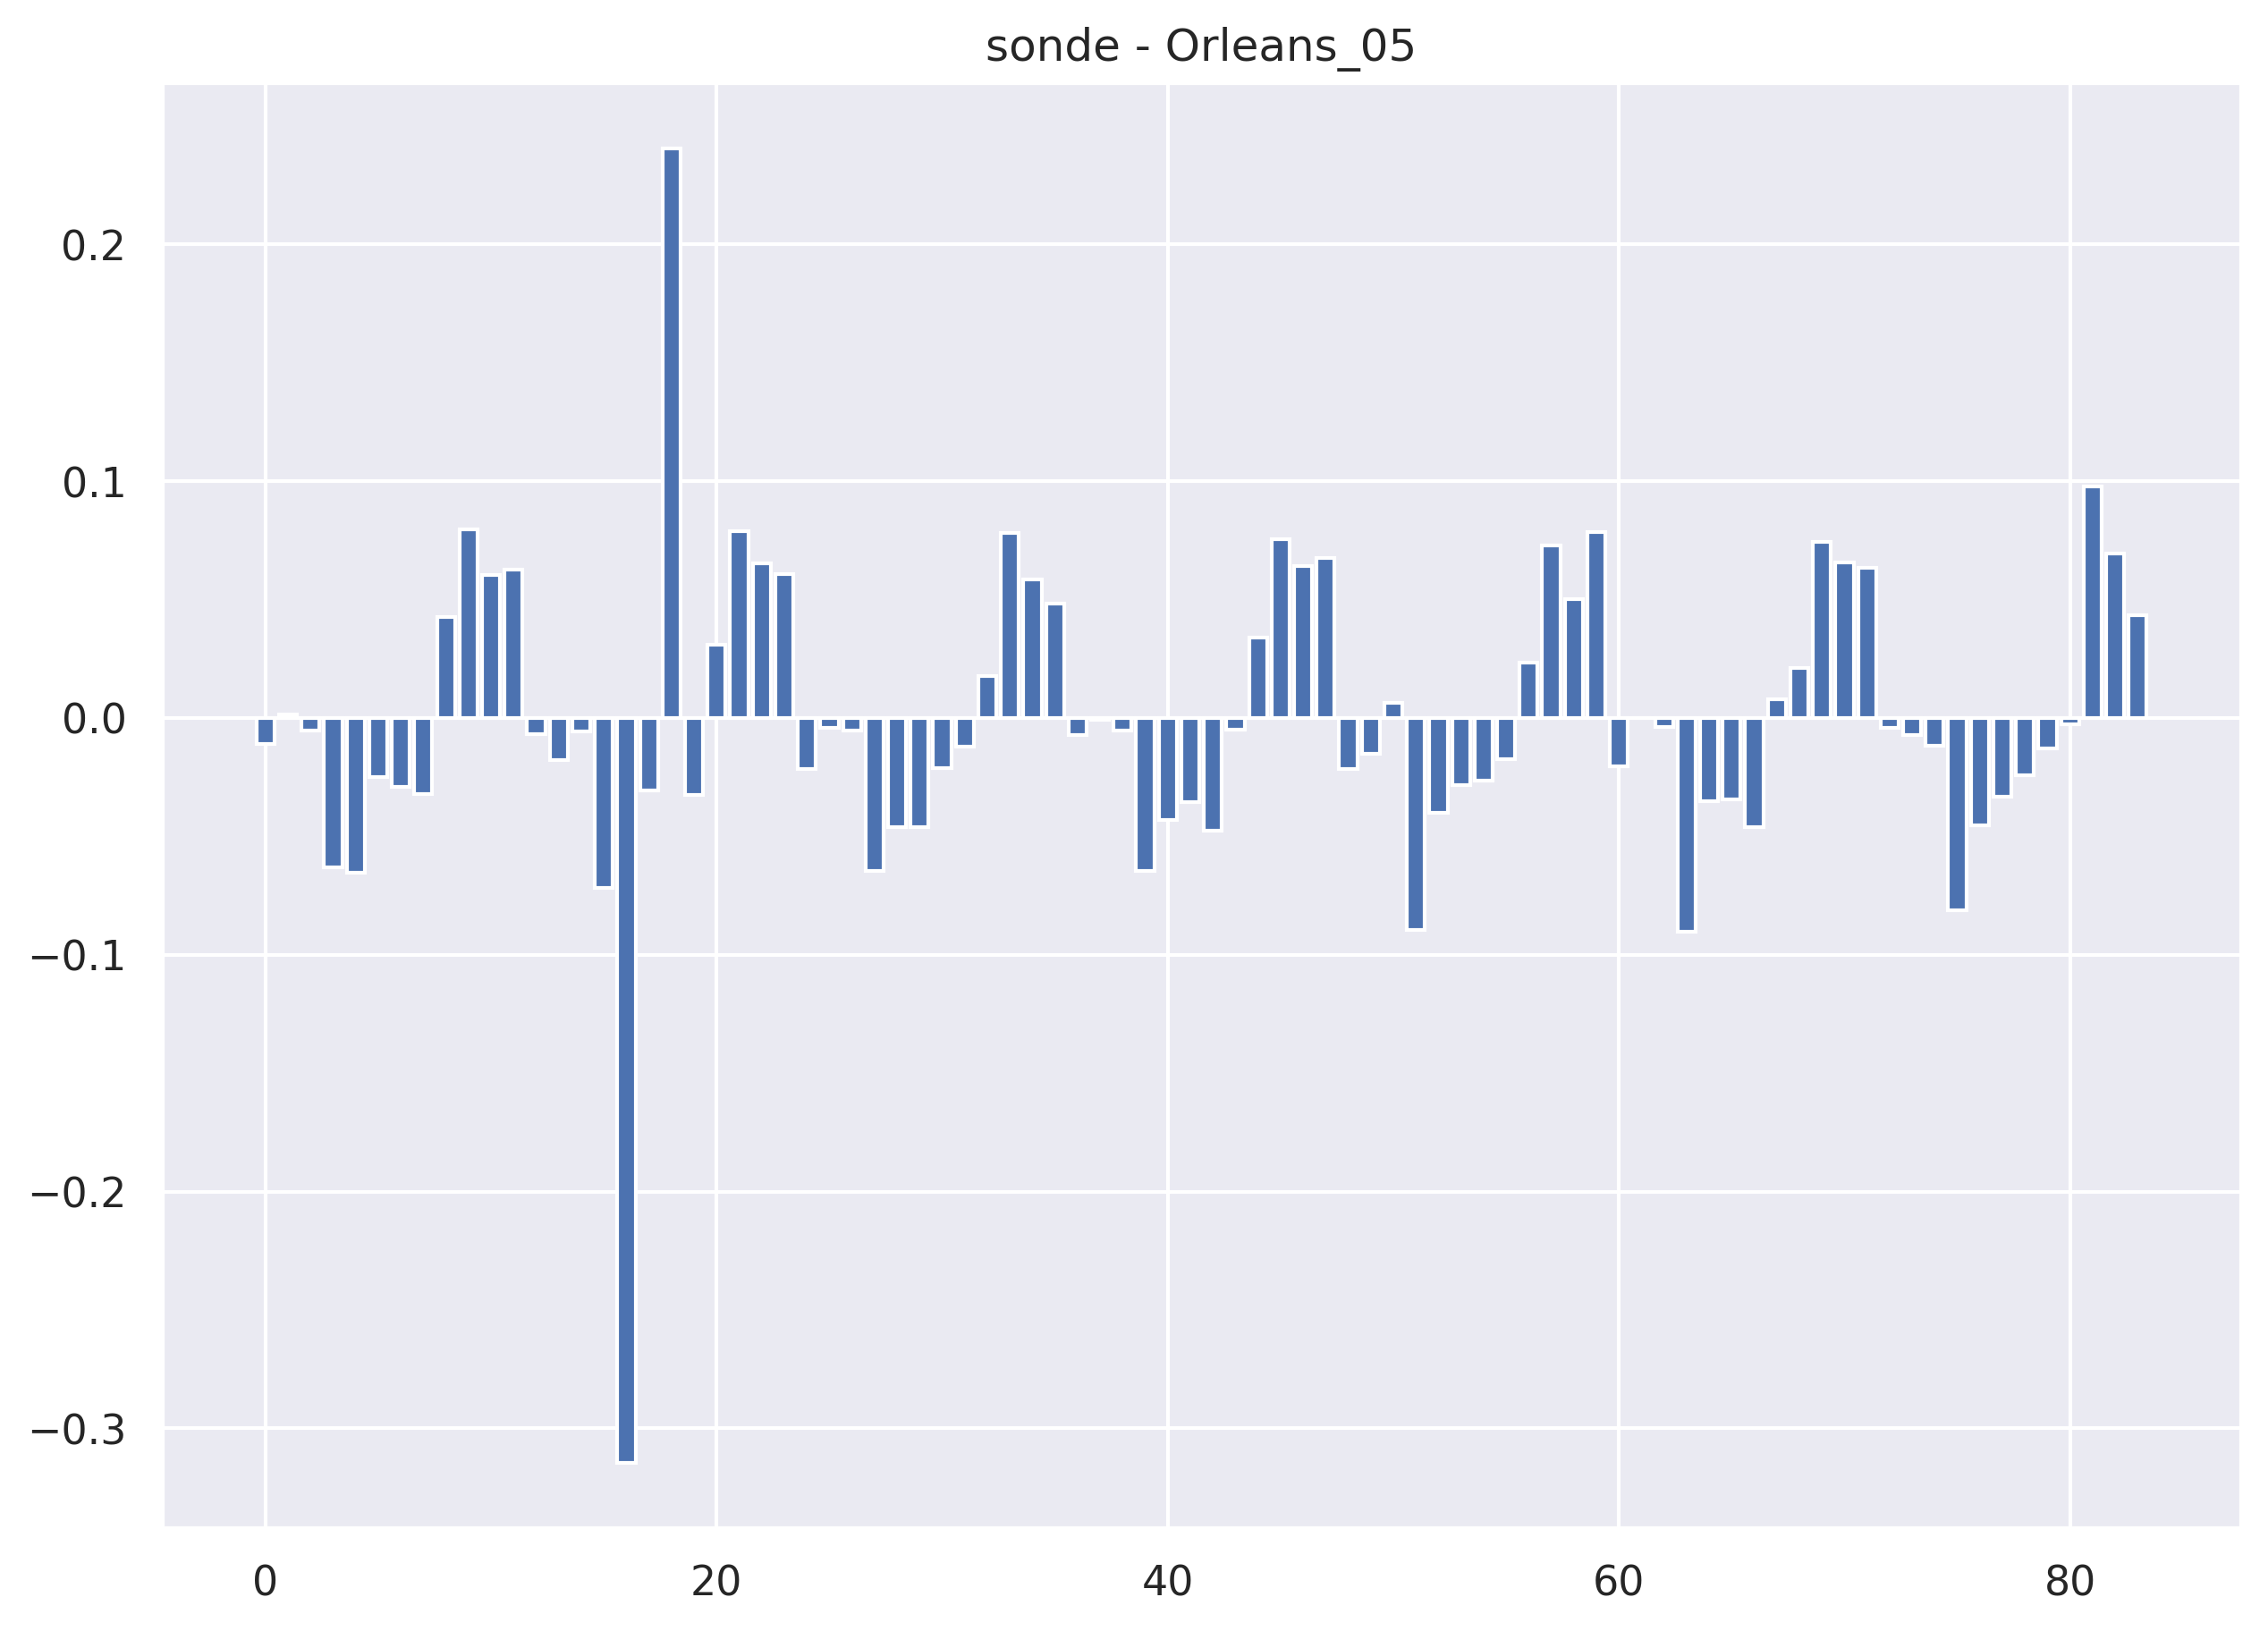

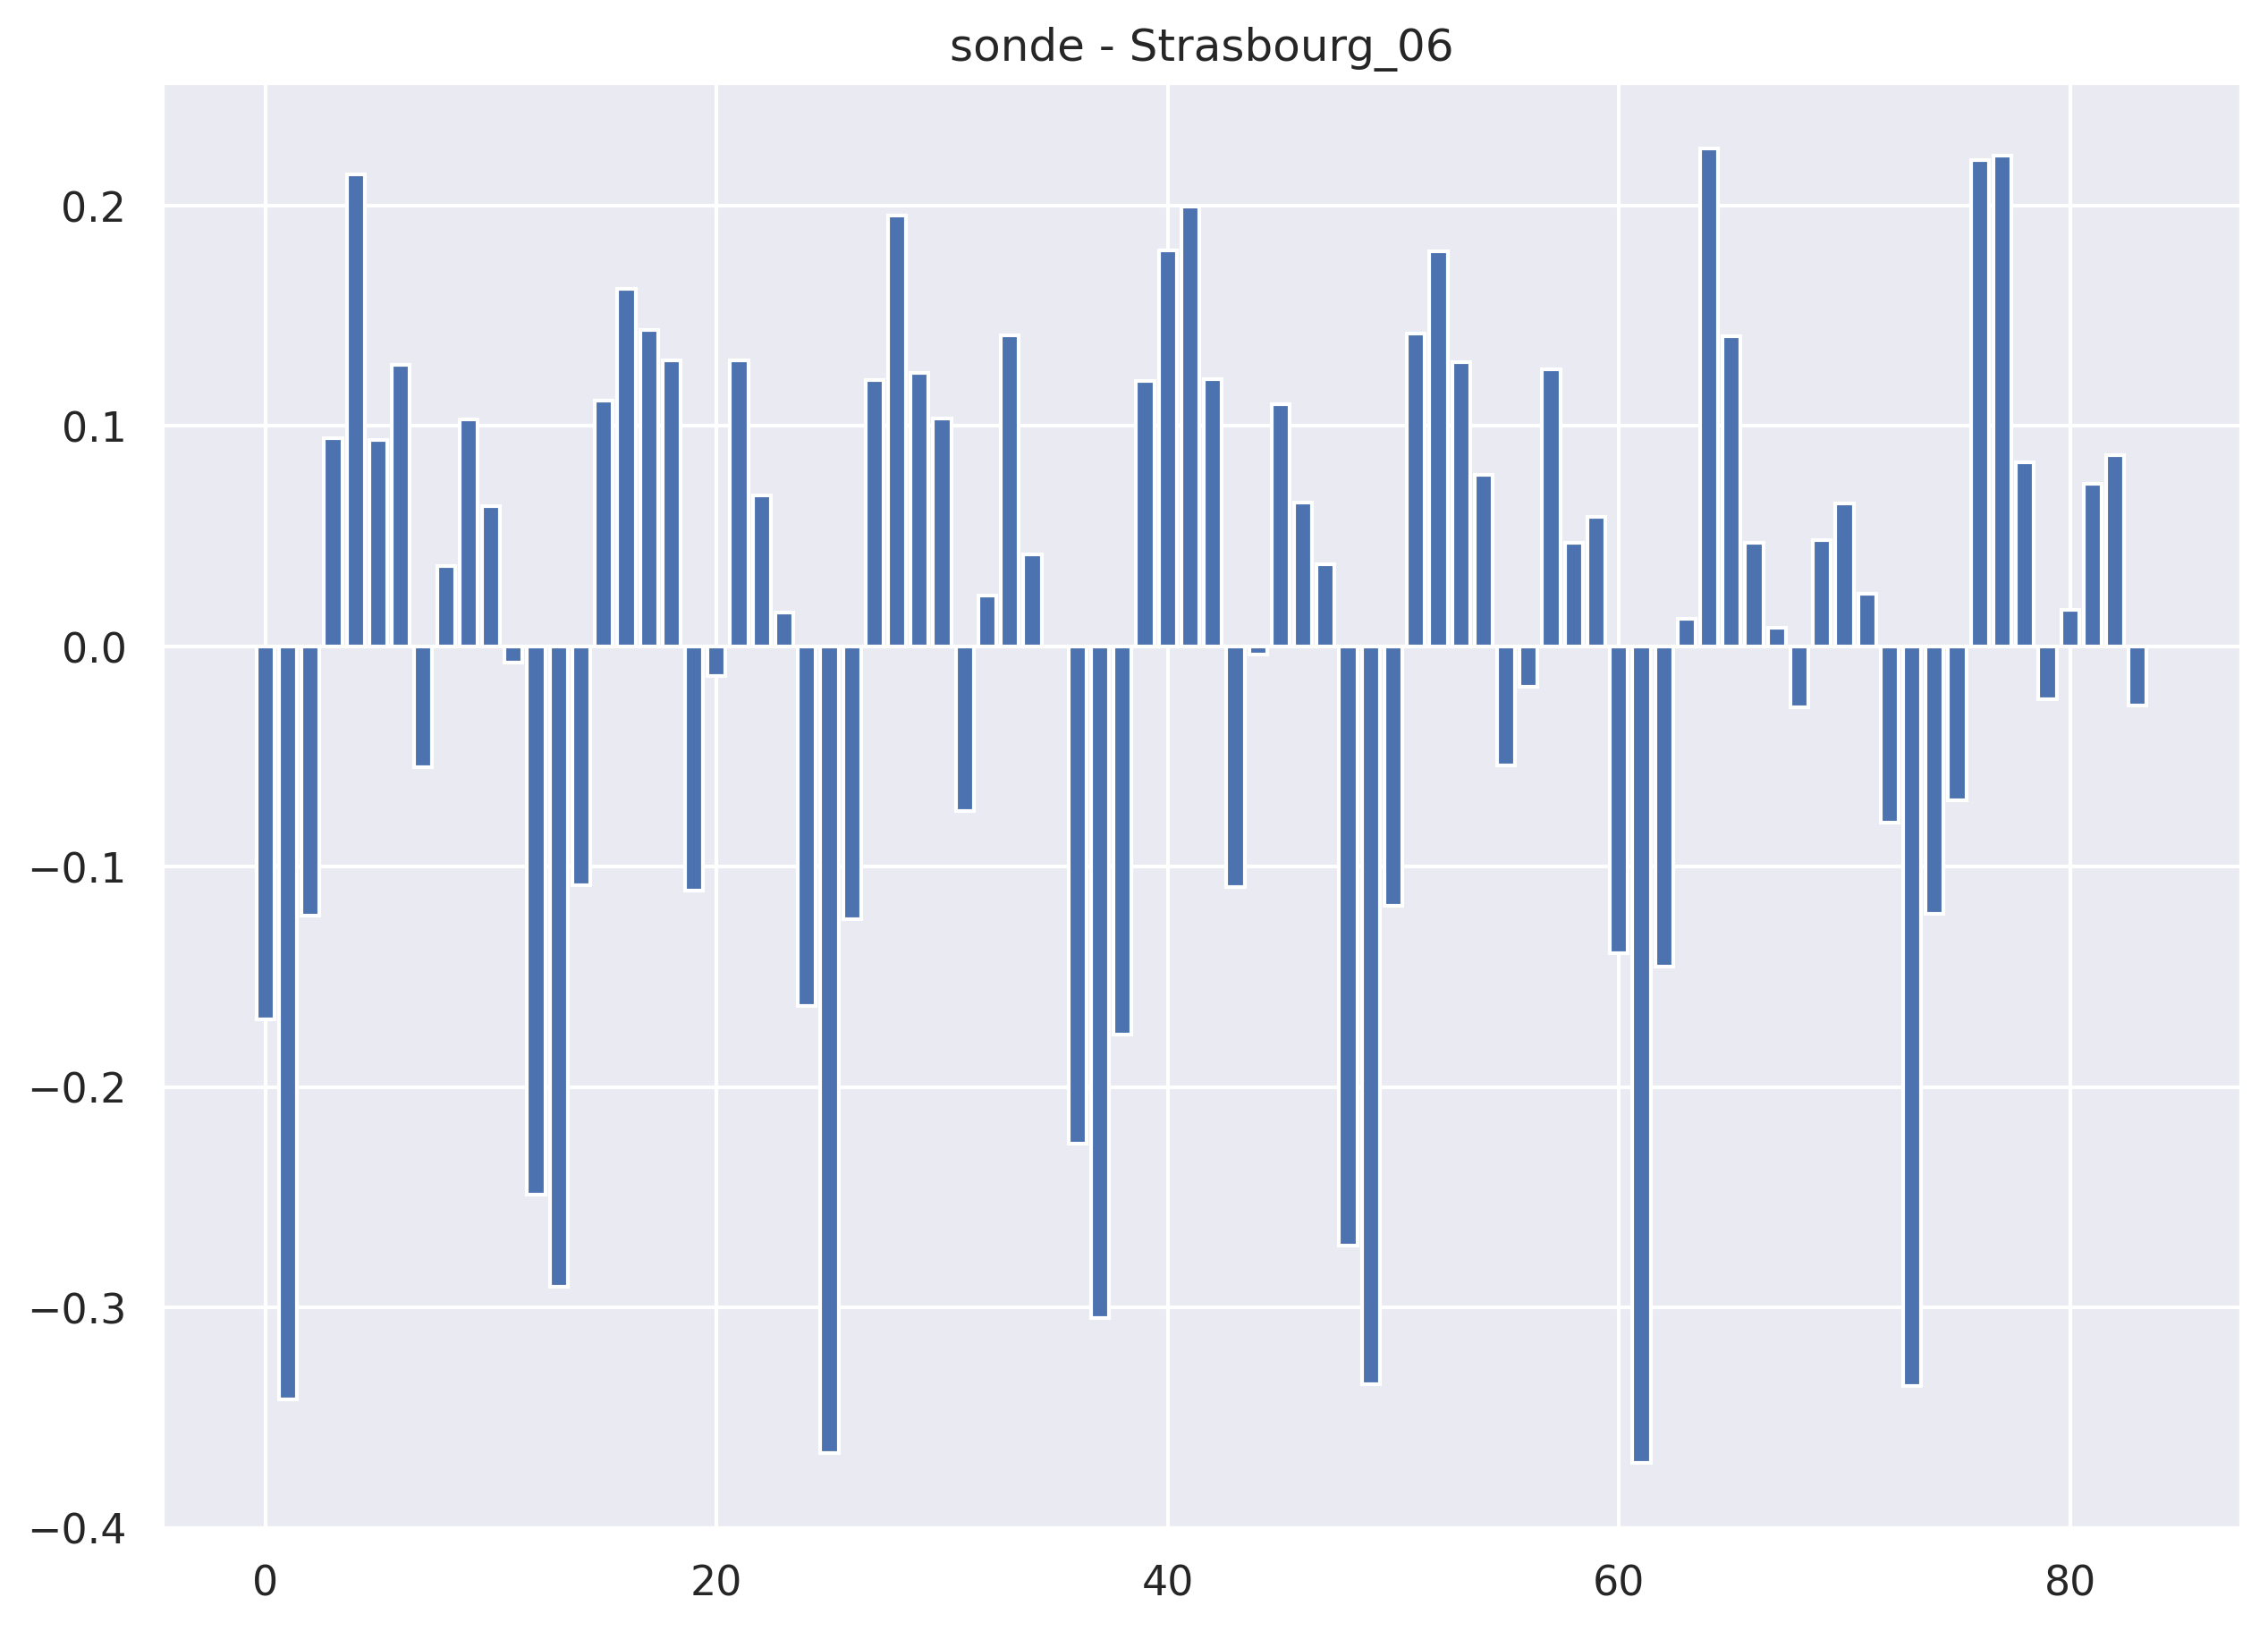

In [ ]:
gm = GaussianMixture(n_components=4, covariance_type="diag").fit(X)

scores_based_on_gm = gm.score_samples(X)
outliers = np.argsort(scores_based_on_gm)[:5]


for i, ind in enumerate(outliers):
    plt.figure(figsize=(10,7))
    #plt.subplot(4, 5, i+1)
    #plt.imshow(x_im[ind])
    plt.title(f"sonde - {dataset.sondes_names[ind]}")
    plt.bar(range(len(X[0])), X[ind])
    plt.show()

In [ ]:
scores_based_on_gm

array([169.40340095, 163.19012075, 126.01896157,  78.68921692,
       121.04390005, 173.62553241, 167.435925  , 147.98972915,
       184.26948763, 172.11032376, 141.66153419, 134.17754951,
       196.74926534, 151.70350743, 137.03380836, 150.98912752,
       159.06881406, 189.39242276, 143.77220723, 171.92849757,
       161.36720939, 145.53063024, 153.85425352, 150.78031128,
       197.01002186, 201.57465474,  58.22823115, 180.11755765,
       150.25709136, 194.92740427, 158.18049941,  97.51754258,
       169.38095916, 168.38524967, 157.22584763, 121.30921067,
       174.62935579, 193.69050401, 113.11259471, 191.54255409,
       186.39515044, 179.76270699, 117.67318015,  -4.14476031,
       174.68058639, 165.36696417, 184.32550813, 159.49440554,
       130.0070288 , 145.6494031 , 138.40825286, 176.28553831,
       182.35189649, 141.00204338, 105.11625747, 169.97317979,
       182.78391311, 165.95423669,  79.61993014, 165.0064201 ,
       171.6675841 , 137.82118923, 204.41340957, 198.21

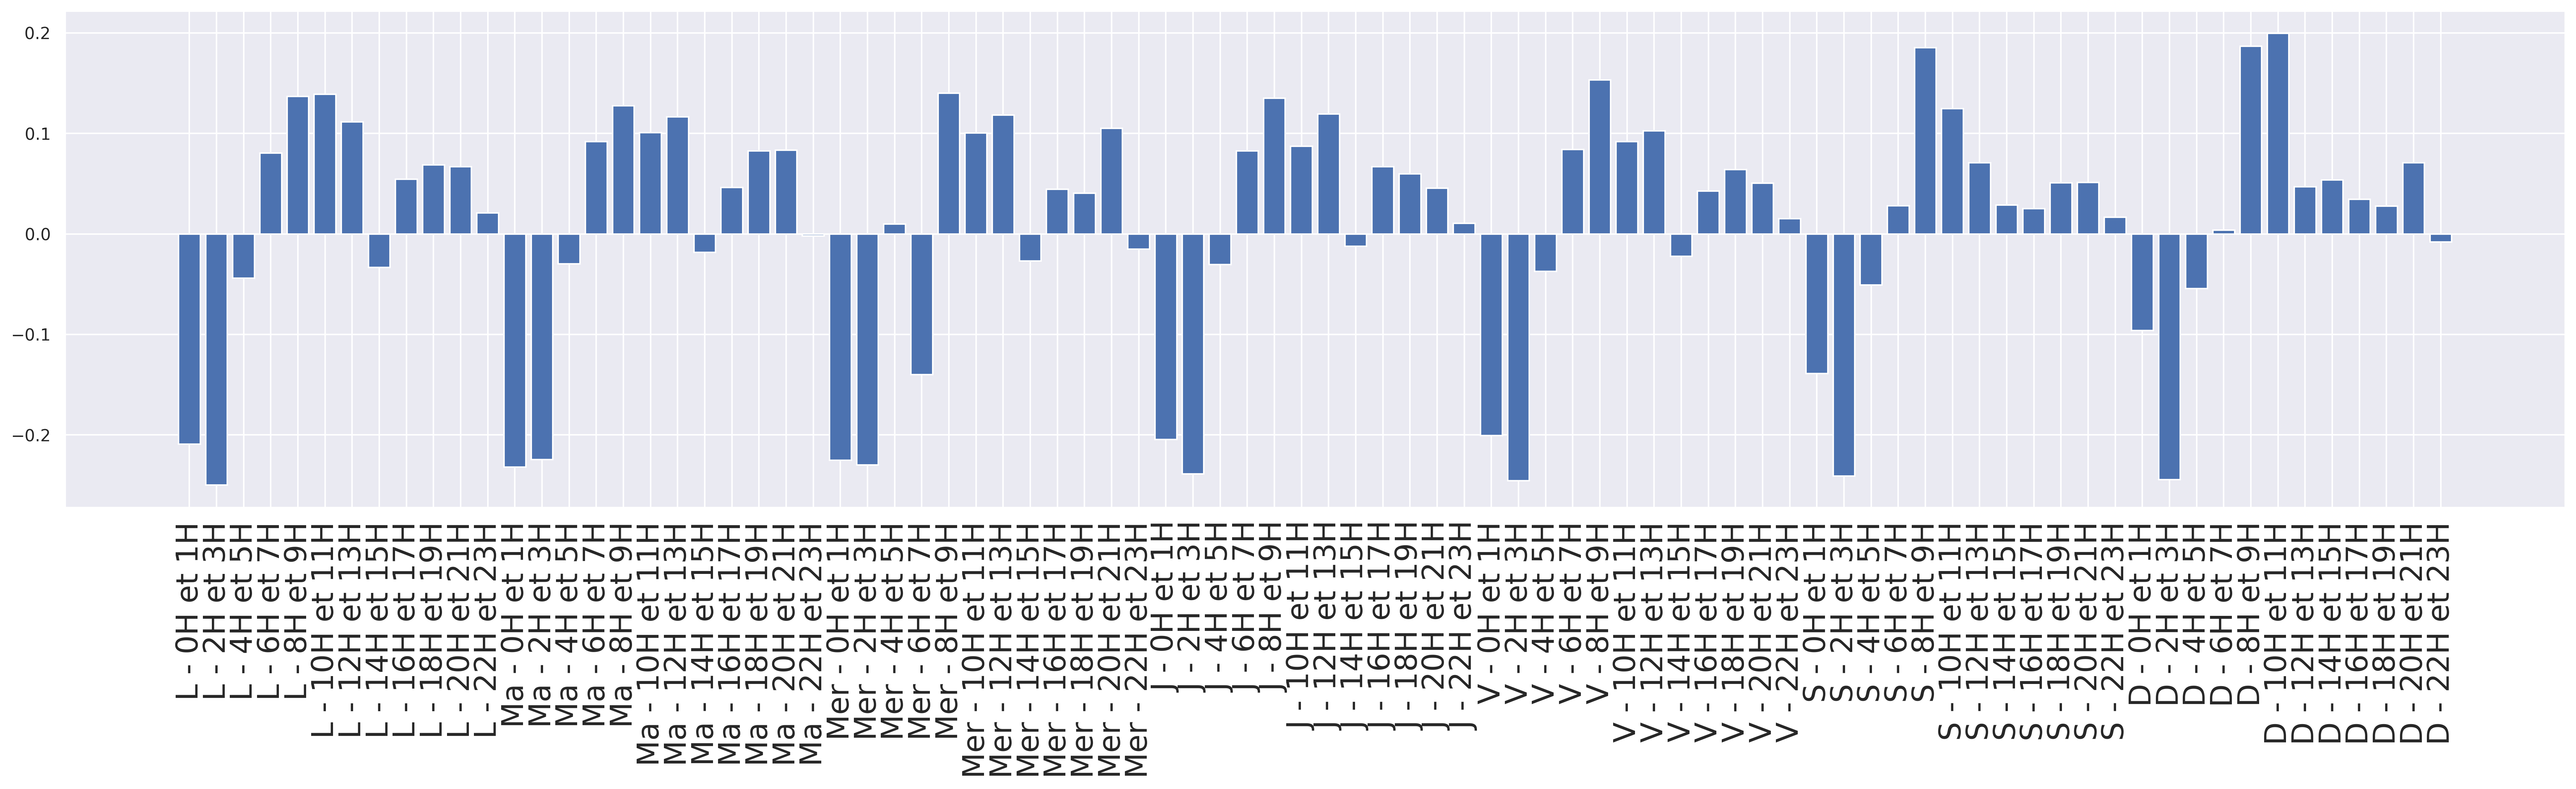

In [113]:
plt.figure(figsize=(30, 6))
plt.bar(range(X.shape[1]), X[15])
plt.xticks(range(len(f)), xticks, rotation=90, fontsize=20)
plt.show()